# Fitted Q

## Training - 1) Linear Regression, Decision Trees, Extra Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import gym
import gym_maze
import pickle

import sys
sys.path.append('/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/')

from model import MDP_model
from maze_functions import createSamples, opt_maze_trajectory, opt_model_trajectory, policy_accuracy, \
    get_maze_transition_reward, plot_paths, value_diff, get_maze_MDP, value_est, opt_path_value_diff, fitted_Q
from MDPtools import SolveMDP
from testing import cluster_size, next_clusters, training_value_error, purity, plot_features, testing_value_error, \
    generalization_accuracy

mazes = {1: 'maze-v0',
         2: 'maze-sample-3x3-v0',
         3: 'maze-random-3x3-v0',
         4: 'maze-sample-5x5-v0',
         5: 'maze-random-5x5-v0',
         6: 'maze-sample-10x10-v0',
         7: 'maze-random-10x10-v0',
         8: 'maze-sample-100x100-v0',
         9: 'maze-random-100x100-v0',
         10: 'maze-random-10x10-plus-v0', # has portals 
         11: 'maze-random-20x20-plus-v0', # has portals 
         12: 'maze-random-30x30-plus-v0'} # has portals 

In [2]:
# Setting parameters for model fitting
max_k = 25
classification = 'DecisionTreeClassifier'
split_classifier_params = {'random_state':0, 'max_depth':2}
clustering = 'Agglomerative'
n_clusters = None
distance_threshold = 0.5
precision_thresh = 1e-14
random_state = 0
pfeatures = 2
gamma = 1
actions = [0, 1, 2, 3]
h = -1
cv = 5
th = 0
eta = 25
reg_dict = {'LinearRegression':'LR', 'DecisionTrees':'DT', 'ExtraTrees':'ET', 'RandomForest': 'RF'}

maze = mazes[4]
Ns = [10, 20, 30, 40, 50, 70, 90, 110, 130, 150, 170, 200]

P, R = get_maze_MDP(maze)
K = 100
f, rw = get_maze_transition_reward(maze)
true_v, true_pi = SolveMDP(P, R, prob='max', gamma=1, epsilon=1e-8)

pygame 2.0.0.dev10 (SDL 2.0.12, python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Optimal Value: [0.44 0.48 0.52 0.8  0.84 0.32 0.44 0.56 0.84 0.88 0.36 0.4  0.6  0.8
 0.92 0.56 0.6  0.64 0.76 0.96 0.52 0.64 0.68 0.72 1.   0.  ]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


In [7]:
path = '/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids_Dropbox/Maze/Model Data/Datasets/Set 2 (risk = -0.04)'
sys.path.append(path)

regression = 'RandomForest'

for set_num in range(8, 10):
    filename = f'set_{set_num}.csv'
    df = pd.read_csv(path+'/'+filename)

    # taking out extra ID col and changing actions back to integers
    df = df.iloc[:, 1:]
    df.loc[df['ACTION']=='None', 'ACTION'] = 4
    df['ACTION'] = pd.to_numeric(df['ACTION'], downcast='integer')
    df.loc[df['ACTION']==4, 'ACTION'] = 'None'
    
    df_full = df.copy()
    
    for n in Ns:
        df_small = df_full.loc[df_full['ID']<n]

        # TODO: train fitted Q on one type
        QK, p, x_df, values = fitted_Q(30, df_small, gamma, pfeatures, actions, rw, regression=regression)
        
        # TODO: save/dump trained policy
        reg = reg_dict[regression]
        pickle.dump(p, open(f'round_{set_num}_fq_N={n}_{reg}.sav', 'wb'))
        
        print('N=', n, ' completed')
    
    print('Set ', set_num, 'completed')
    

     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.401014  -0.206010      0 -0.04           0   
1     0     1   0.820790  -0.416625      2 -0.04           0   
2     0     2   1.795879  -0.621839      2 -0.04           1   
3     0     3   2.607279  -0.576041      1 -0.04           2   
4     0     4   2.663334  -1.086769      1 -0.04           7   
..   ..   ...        ...        ...    ...   ...         ...   
202   9    14   3.368932  -1.620738      2 -0.04           8   
203   9    15   4.028603  -1.868648      1 -0.04           9   
204   9    16   4.841586  -2.665093      1 -0.04          14   
205   9    17   4.602530  -3.714134      1 -0.04          19   
206   9    18   4.723427  -4.020401   None  1.00          24   

                                           x_t2  \
0    [0.8207901504438192, -0.41662545651615823]   
1     [1.7958787667246776, -0.6218385125930341]   
2      [2.607278956599389, -0.5760406089612767]   
3     [2.6633337425799266, 

  3%|▎         | 1/30 [00:00<00:11,  2.62it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:08<01:15,  2.71s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:14<01:38,  3.63s/it]

Iteration: 2 Start Value [-0.15996652] action [0]


 13%|█▎        | 4/30 [00:19<01:50,  4.24s/it]

Iteration: 3 Start Value [-0.19994236] action [0]


 17%|█▋        | 5/30 [00:26<01:59,  4.79s/it]

Iteration: 4 Start Value [-0.23989973] action [0]


 20%|██        | 6/30 [00:31<02:02,  5.09s/it]

Iteration: 5 Start Value [-0.2798679] action [0]


 23%|██▎       | 7/30 [00:40<02:20,  6.09s/it]

Iteration: 6 Start Value [-0.31980014] action [0]


 27%|██▋       | 8/30 [00:45<02:09,  5.89s/it]

Iteration: 7 Start Value [-0.35967581] action [2]


 30%|███       | 9/30 [00:51<02:02,  5.83s/it]

Iteration: 8 Start Value [-0.39893167] action [0]


 33%|███▎      | 10/30 [00:56<01:52,  5.61s/it]

Iteration: 9 Start Value [-0.43515305] action [2]


 37%|███▋      | 11/30 [01:01<01:43,  5.45s/it]

Iteration: 10 Start Value [-0.46867891] action [1]


 40%|████      | 12/30 [01:08<01:43,  5.77s/it]

Iteration: 11 Start Value [-0.48656076] action [1]


 43%|████▎     | 13/30 [01:13<01:38,  5.78s/it]

Iteration: 12 Start Value [-0.48736385] action [2]


 47%|████▋     | 14/30 [01:19<01:32,  5.81s/it]

Iteration: 13 Start Value [-0.3120936] action [2]


 50%|█████     | 15/30 [01:25<01:25,  5.70s/it]

Iteration: 14 Start Value [-0.04000341] action [2]


 53%|█████▎    | 16/30 [01:30<01:17,  5.57s/it]

Iteration: 15 Start Value [0.14359113] action [2]


 57%|█████▋    | 17/30 [01:36<01:14,  5.74s/it]

Iteration: 16 Start Value [0.28373806] action [2]


 60%|██████    | 18/30 [01:44<01:15,  6.28s/it]

Iteration: 17 Start Value [0.34823333] action [2]


 63%|██████▎   | 19/30 [01:49<01:06,  6.01s/it]

Iteration: 18 Start Value [0.38022164] action [2]


 67%|██████▋   | 20/30 [01:54<00:57,  5.80s/it]

Iteration: 19 Start Value [0.39435012] action [2]


 70%|███████   | 21/30 [02:00<00:50,  5.62s/it]

Iteration: 20 Start Value [0.39549359] action [2]


 73%|███████▎  | 22/30 [02:05<00:44,  5.50s/it]

Iteration: 21 Start Value [0.39666809] action [2]


 77%|███████▋  | 23/30 [02:11<00:39,  5.59s/it]

Iteration: 22 Start Value [0.40258964] action [2]


 80%|████████  | 24/30 [02:16<00:33,  5.62s/it]

Iteration: 23 Start Value [0.40106175] action [2]


 83%|████████▎ | 25/30 [02:22<00:27,  5.57s/it]

Iteration: 24 Start Value [0.40068106] action [2]


 87%|████████▋ | 26/30 [02:29<00:24,  6.04s/it]

Iteration: 25 Start Value [0.40121371] action [2]


 90%|█████████ | 27/30 [02:38<00:20,  6.98s/it]

Iteration: 26 Start Value [0.40606432] action [2]


 93%|█████████▎| 28/30 [02:44<00:13,  6.70s/it]

Iteration: 27 Start Value [0.40143598] action [2]


 97%|█████████▋| 29/30 [02:49<00:06,  6.31s/it]

Iteration: 28 Start Value [0.40531964] action [2]


100%|██████████| 30/30 [02:57<00:00,  5.91s/it]

Iteration: 29 Start Value [0.40404735] action [2]


N= 10  completed
     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.401014  -0.206010      0 -0.04           0   
1     0     1   0.820790  -0.416625      2 -0.04           0   
2     0     2   1.795879  -0.621839      2 -0.04           1   
3     0     3   2.607279  -0.576041      1 -0.04           2   
4     0     4   2.663334  -1.086769      1 -0.04           7   
..   ..   ...        ...        ...    ...   ...         ...   
430  19    19   4.133525  -1.950847      0 -0.04           9   
431  19    20   4.791731  -0.972269      3 -0.04           4   
432  19    21   3.692617  -0.969628      3 -0.04           3   
433  19    22   3.390157  -0.903748      2 -0.04           3   
434  19    23   4.018289  -0.806654      0 -0.04           4   

                                           x_t2  \
0    [0.8207901504438192, -0.41662545651615823]   
1     [1.7958787667246776, -0.6218385125930341]   
2      [2.607278956599389, -0.5760406089612767]   
3     [2.6

  3%|▎         | 1/30 [00:00<00:08,  3.57it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:15<02:09,  4.64s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:28<03:14,  7.21s/it]

Iteration: 2 Start Value [-0.1599327] action [0]


 13%|█▎        | 4/30 [00:39<03:40,  8.47s/it]

Iteration: 3 Start Value [-0.19985437] action [0]


 17%|█▋        | 5/30 [00:51<03:53,  9.32s/it]

Iteration: 4 Start Value [-0.23978063] action [0]


 20%|██        | 6/30 [01:04<04:14, 10.59s/it]

Iteration: 5 Start Value [-0.27972448] action [0]


 23%|██▎       | 7/30 [01:21<04:47, 12.51s/it]

Iteration: 6 Start Value [-0.31965808] action [0]


 27%|██▋       | 8/30 [01:34<04:38, 12.66s/it]

Iteration: 7 Start Value [-0.35957017] action [1]


 30%|███       | 9/30 [01:45<04:15, 12.18s/it]

Iteration: 8 Start Value [-0.39877355] action [2]


 33%|███▎      | 10/30 [01:57<04:02, 12.10s/it]

Iteration: 9 Start Value [-0.43738109] action [2]


 37%|███▋      | 11/30 [02:09<03:46, 11.93s/it]

Iteration: 10 Start Value [-0.47089619] action [2]


 40%|████      | 12/30 [02:22<03:41, 12.32s/it]

Iteration: 11 Start Value [-0.49213561] action [2]


 43%|████▎     | 13/30 [02:37<03:42, 13.11s/it]

Iteration: 12 Start Value [-0.38485952] action [2]


 47%|████▋     | 14/30 [02:52<03:39, 13.69s/it]

Iteration: 13 Start Value [-0.11175068] action [2]


 50%|█████     | 15/30 [03:06<03:29, 13.98s/it]

Iteration: 14 Start Value [0.19695505] action [2]


 53%|█████▎    | 16/30 [03:20<03:13, 13.85s/it]

Iteration: 15 Start Value [0.33171521] action [2]


 57%|█████▋    | 17/30 [03:33<02:56, 13.58s/it]

Iteration: 16 Start Value [0.39926477] action [2]


 60%|██████    | 18/30 [03:47<02:45, 13.83s/it]

Iteration: 17 Start Value [0.41778875] action [2]


 63%|██████▎   | 19/30 [04:00<02:28, 13.49s/it]

Iteration: 18 Start Value [0.42470187] action [2]


 67%|██████▋   | 20/30 [04:13<02:14, 13.43s/it]

Iteration: 19 Start Value [0.42513341] action [2]


 70%|███████   | 21/30 [04:26<01:58, 13.12s/it]

Iteration: 20 Start Value [0.42493881] action [2]


 73%|███████▎  | 22/30 [04:40<01:48, 13.60s/it]

Iteration: 21 Start Value [0.42493593] action [2]


 77%|███████▋  | 23/30 [04:56<01:38, 14.05s/it]

Iteration: 22 Start Value [0.42448974] action [2]


 80%|████████  | 24/30 [05:11<01:26, 14.44s/it]

Iteration: 23 Start Value [0.42547346] action [2]


 83%|████████▎ | 25/30 [05:25<01:11, 14.25s/it]

Iteration: 24 Start Value [0.42502914] action [2]


 87%|████████▋ | 26/30 [05:40<00:57, 14.43s/it]

Iteration: 25 Start Value [0.42516822] action [2]


 90%|█████████ | 27/30 [05:53<00:42, 14.06s/it]

Iteration: 26 Start Value [0.4251542] action [2]


 93%|█████████▎| 28/30 [06:07<00:28, 14.20s/it]

Iteration: 27 Start Value [0.42386178] action [2]


 97%|█████████▋| 29/30 [06:23<00:14, 14.55s/it]

Iteration: 28 Start Value [0.42445513] action [2]


100%|██████████| 30/30 [06:39<00:00, 13.32s/it]

Iteration: 29 Start Value [0.4239038] action [2]
N= 20  completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.401014  -0.206010      0 -0.04           0   
1     0     1   0.820790  -0.416625      2 -0.04           0   
2     0     2   1.795879  -0.621839      2 -0.04           1   
3     0     3   2.607279  -0.576041      1 -0.04           2   
4     0     4   2.663334  -1.086769      1 -0.04           7   
..   ..   ...        ...        ...    ...   ...         ...   
654  29    18   3.296484  -1.085006      2 -0.04           8   
655  29    19   4.712629  -1.718475      1 -0.04           9   
656  29    20   4.179937  -2.221055      1 -0.04          14   
657  29    21   4.427442  -3.638947      1 -0.04          19   
658  29    22   4.123249  -4.952282   None  1.00          24   

                                           x_t2  \
0    [0.8207901504438192, -0.41662545651615823]   
1     [1.7958787667246776, -0.6218385125930341]   
2      [2.607278956599389, -0.5760406089612767]   
3     [2.6633337425799266, 

  3%|▎         | 1/30 [00:00<00:10,  2.65it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:22<03:14,  6.96s/it]

Iteration: 1 Start Value [-0.12] action [3]


 10%|█         | 3/30 [00:40<04:38, 10.32s/it]

Iteration: 2 Start Value [-0.15990446] action [0]


 13%|█▎        | 4/30 [00:59<05:36, 12.94s/it]

Iteration: 3 Start Value [-0.19984518] action [0]


 17%|█▋        | 5/30 [01:19<06:10, 14.80s/it]

Iteration: 4 Start Value [-0.23955431] action [2]


 20%|██        | 6/30 [01:38<06:28, 16.20s/it]

Iteration: 5 Start Value [-0.27935066] action [2]


 23%|██▎       | 7/30 [01:56<06:28, 16.88s/it]

Iteration: 6 Start Value [-0.31705525] action [2]


 27%|██▋       | 8/30 [02:17<06:38, 18.09s/it]

Iteration: 7 Start Value [-0.34927464] action [2]


 30%|███       | 9/30 [02:39<06:43, 19.22s/it]

Iteration: 8 Start Value [-0.3764021] action [2]


 33%|███▎      | 10/30 [03:02<06:45, 20.28s/it]

Iteration: 9 Start Value [-0.3968028] action [2]


 37%|███▋      | 11/30 [03:26<06:45, 21.33s/it]

Iteration: 10 Start Value [-0.40700834] action [2]


 40%|████      | 12/30 [03:48<06:26, 21.45s/it]

Iteration: 11 Start Value [-0.41366853] action [2]


 43%|████▎     | 13/30 [04:08<06:01, 21.29s/it]

Iteration: 12 Start Value [-0.18492981] action [2]


 47%|████▋     | 14/30 [04:30<05:42, 21.38s/it]

Iteration: 13 Start Value [0.1022283] action [2]


 50%|█████     | 15/30 [04:54<05:32, 22.17s/it]

Iteration: 14 Start Value [0.28441514] action [2]


 53%|█████▎    | 16/30 [05:15<05:04, 21.74s/it]

Iteration: 15 Start Value [0.38652011] action [2]


 57%|█████▋    | 17/30 [05:34<04:30, 20.84s/it]

Iteration: 16 Start Value [0.4169474] action [2]


 60%|██████    | 18/30 [06:00<04:31, 22.65s/it]

Iteration: 17 Start Value [0.42820093] action [2]


 63%|██████▎   | 19/30 [06:21<04:03, 22.13s/it]

Iteration: 18 Start Value [0.43148616] action [2]


 67%|██████▋   | 20/30 [06:42<03:38, 21.82s/it]

Iteration: 19 Start Value [0.43167746] action [2]


 70%|███████   | 21/30 [07:02<03:10, 21.18s/it]

Iteration: 20 Start Value [0.43126749] action [2]


 73%|███████▎  | 22/30 [07:20<02:41, 20.21s/it]

Iteration: 21 Start Value [0.43133896] action [2]


 77%|███████▋  | 23/30 [07:44<02:28, 21.24s/it]

Iteration: 22 Start Value [0.43096101] action [2]


 80%|████████  | 24/30 [08:01<02:01, 20.17s/it]

Iteration: 23 Start Value [0.43132742] action [2]


 83%|████████▎ | 25/30 [08:22<01:40, 20.19s/it]

Iteration: 24 Start Value [0.43121319] action [2]


 87%|████████▋ | 26/30 [08:46<01:25, 21.44s/it]

Iteration: 25 Start Value [0.43062341] action [2]


 90%|█████████ | 27/30 [09:07<01:04, 21.38s/it]

Iteration: 26 Start Value [0.43047771] action [2]


 93%|█████████▎| 28/30 [09:25<00:40, 20.43s/it]

Iteration: 27 Start Value [0.43054486] action [2]


 97%|█████████▋| 29/30 [09:46<00:20, 20.35s/it]

Iteration: 28 Start Value [0.43073237] action [2]


100%|██████████| 30/30 [10:05<00:00, 20.19s/it]

Iteration: 29 Start Value [0.43082068] action [2]
N= 30  completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.401014  -0.206010      0 -0.04           0   
1     0     1   0.820790  -0.416625      2 -0.04           0   
2     0     2   1.795879  -0.621839      2 -0.04           1   
3     0     3   2.607279  -0.576041      1 -0.04           2   
4     0     4   2.663334  -1.086769      1 -0.04           7   
..   ..   ...        ...        ...    ...   ...         ...   
892  39    18   4.423351  -1.493173      1 -0.04           9   
893  39    19   4.491930  -2.680328      2 -0.04          14   
894  39    20   4.897709  -2.858691      1 -0.04          14   
895  39    21   4.028436  -3.839110      1 -0.04          19   
896  39    22   4.979159  -4.661289   None  1.00          24   

                                           x_t2  \
0    [0.8207901504438192, -0.41662545651615823]   
1     [1.7958787667246776, -0.6218385125930341]   
2      [2.607278956599389, -0.5760406089612767]   
3     [2.6633337425799266, 

  3%|▎         | 1/30 [00:00<00:09,  3.03it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:22<03:11,  6.84s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:43<05:03, 11.24s/it]

Iteration: 2 Start Value [-0.15999663] action [0]


 13%|█▎        | 4/30 [01:07<06:26, 14.86s/it]

Iteration: 3 Start Value [-0.19999266] action [0]


 17%|█▋        | 5/30 [01:29<07:08, 17.15s/it]

Iteration: 4 Start Value [-0.23998427] action [0]


 20%|██        | 6/30 [01:51<07:23, 18.49s/it]

Iteration: 5 Start Value [-0.27996637] action [0]


 23%|██▎       | 7/30 [02:20<08:17, 21.65s/it]

Iteration: 6 Start Value [-0.31996223] action [0]


 27%|██▋       | 8/30 [02:43<08:05, 22.06s/it]

Iteration: 7 Start Value [-0.35993223] action [0]


 30%|███       | 9/30 [03:06<07:48, 22.32s/it]

Iteration: 8 Start Value [-0.39986151] action [1]


 33%|███▎      | 10/30 [03:28<07:25, 22.26s/it]

Iteration: 9 Start Value [-0.4386986] action [2]


 37%|███▋      | 11/30 [03:51<07:09, 22.59s/it]

Iteration: 10 Start Value [-0.47659357] action [2]


 40%|████      | 12/30 [04:14<06:46, 22.58s/it]

Iteration: 11 Start Value [-0.50517868] action [2]


 43%|████▎     | 13/30 [04:40<06:39, 23.52s/it]

Iteration: 12 Start Value [-0.02601391] action [2]


 47%|████▋     | 14/30 [05:09<06:46, 25.41s/it]

Iteration: 13 Start Value [0.27397821] action [2]


 50%|█████     | 15/30 [05:32<06:07, 24.52s/it]

Iteration: 14 Start Value [0.32706219] action [2]


 53%|█████▎    | 16/30 [05:55<05:37, 24.08s/it]

Iteration: 15 Start Value [0.41859153] action [2]


 57%|█████▋    | 17/30 [06:18<05:08, 23.76s/it]

Iteration: 16 Start Value [0.43731056] action [2]


 60%|██████    | 18/30 [06:41<04:44, 23.72s/it]

Iteration: 17 Start Value [0.43698288] action [2]


 63%|██████▎   | 19/30 [07:08<04:30, 24.55s/it]

Iteration: 18 Start Value [0.43406027] action [2]


 67%|██████▋   | 20/30 [07:31<04:01, 24.20s/it]

Iteration: 19 Start Value [0.43217725] action [2]


 70%|███████   | 21/30 [08:01<03:51, 25.78s/it]

Iteration: 20 Start Value [0.43551937] action [2]


 73%|███████▎  | 22/30 [08:36<03:47, 28.47s/it]

Iteration: 21 Start Value [0.43629747] action [2]


 77%|███████▋  | 23/30 [08:58<03:06, 26.68s/it]

Iteration: 22 Start Value [0.43606896] action [2]


 80%|████████  | 24/30 [09:32<02:53, 28.99s/it]

Iteration: 23 Start Value [0.43508232] action [2]


 83%|████████▎ | 25/30 [09:57<02:17, 27.57s/it]

Iteration: 24 Start Value [0.4352634] action [2]


 87%|████████▋ | 26/30 [10:20<01:44, 26.21s/it]

Iteration: 25 Start Value [0.43566659] action [2]


 90%|█████████ | 27/30 [10:46<01:18, 26.30s/it]

Iteration: 26 Start Value [0.43555291] action [2]


 93%|█████████▎| 28/30 [11:13<00:52, 26.50s/it]

Iteration: 27 Start Value [0.43573474] action [2]


 97%|█████████▋| 29/30 [11:41<00:26, 26.91s/it]

Iteration: 28 Start Value [0.43552183] action [2]


100%|██████████| 30/30 [12:08<00:00, 24.28s/it]

Iteration: 29 Start Value [0.43594418] action [2]
N= 40  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.401014  -0.206010      0 -0.04           0   
1      0     1   0.820790  -0.416625      2 -0.04           0   
2      0     2   1.795879  -0.621839      2 -0.04           1   
3      0     3   2.607279  -0.576041      1 -0.04           2   
4      0     4   2.663334  -1.086769      1 -0.04           7   
...   ..   ...        ...        ...    ...   ...         ...   
1113  49    16   3.779051  -1.688121      2 -0.04           8   
1114  49    17   4.284611  -1.862994      1 -0.04           9   
1115  49    18   4.148050  -2.964558      1 -0.04          14   
1116  49    19   4.973775  -3.042837      1 -0.04          19   
1117  49    20   4.487829  -4.529222   None  1.00          24   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   
3      [2.6

  3%|▎         | 1/30 [00:00<00:27,  1.07it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:41<06:02, 12.94s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [01:31<10:45, 23.91s/it]

Iteration: 2 Start Value [-0.1599992] action [0]


 13%|█▎        | 4/30 [02:16<13:05, 30.22s/it]

Iteration: 3 Start Value [-0.19999733] action [0]


 17%|█▋        | 5/30 [02:57<14:00, 33.63s/it]

Iteration: 4 Start Value [-0.23999324] action [0]


 20%|██        | 6/30 [03:51<15:53, 39.73s/it]

Iteration: 5 Start Value [-0.27996226] action [0]


 23%|██▎       | 7/30 [04:35<15:38, 40.80s/it]

Iteration: 6 Start Value [-0.31995508] action [0]


 27%|██▋       | 8/30 [05:22<15:42, 42.86s/it]

Iteration: 7 Start Value [-0.35993193] action [0]


 30%|███       | 9/30 [06:11<15:36, 44.58s/it]

Iteration: 8 Start Value [-0.39980478] action [0]


 33%|███▎      | 10/30 [06:51<14:25, 43.29s/it]

Iteration: 9 Start Value [-0.43970223] action [0]


 37%|███▋      | 11/30 [07:41<14:18, 45.20s/it]

Iteration: 10 Start Value [-0.47783856] action [2]


 40%|████      | 12/30 [08:28<13:46, 45.90s/it]

Iteration: 11 Start Value [-0.49359883] action [1]


 43%|████▎     | 13/30 [09:10<12:37, 44.53s/it]

Iteration: 12 Start Value [0.10710212] action [2]


 47%|████▋     | 14/30 [09:56<12:01, 45.07s/it]

Iteration: 13 Start Value [0.2329137] action [2]


 50%|█████     | 15/30 [10:34<10:45, 43.03s/it]

Iteration: 14 Start Value [0.39120741] action [2]


 53%|█████▎    | 16/30 [11:24<10:28, 44.87s/it]

Iteration: 15 Start Value [0.43431689] action [2]


 57%|█████▋    | 17/30 [12:04<09:27, 43.68s/it]

Iteration: 16 Start Value [0.44153416] action [2]


 60%|██████    | 18/30 [12:47<08:38, 43.23s/it]

Iteration: 17 Start Value [0.43810263] action [2]


 63%|██████▎   | 19/30 [13:25<07:40, 41.90s/it]

Iteration: 18 Start Value [0.43731245] action [2]


 67%|██████▋   | 20/30 [14:03<06:47, 40.76s/it]

Iteration: 19 Start Value [0.43774875] action [2]


 70%|███████   | 21/30 [14:45<06:10, 41.12s/it]

Iteration: 20 Start Value [0.43911651] action [2]


 73%|███████▎  | 22/30 [15:30<05:37, 42.23s/it]

Iteration: 21 Start Value [0.43870933] action [2]


 77%|███████▋  | 23/30 [16:08<04:45, 40.79s/it]

Iteration: 22 Start Value [0.43860029] action [2]


 80%|████████  | 24/30 [16:49<04:05, 40.96s/it]

Iteration: 23 Start Value [0.4387071] action [2]


 83%|████████▎ | 25/30 [17:36<03:33, 42.74s/it]

Iteration: 24 Start Value [0.43877231] action [2]


 87%|████████▋ | 26/30 [18:16<02:47, 41.97s/it]

Iteration: 25 Start Value [0.43904262] action [2]


 90%|█████████ | 27/30 [18:53<02:00, 40.29s/it]

Iteration: 26 Start Value [0.43890078] action [2]


 93%|█████████▎| 28/30 [19:35<01:22, 41.02s/it]

Iteration: 27 Start Value [0.43880246] action [2]


 97%|█████████▋| 29/30 [20:18<00:41, 41.40s/it]

Iteration: 28 Start Value [0.43875757] action [2]


100%|██████████| 30/30 [21:02<00:00, 42.09s/it]

Iteration: 29 Start Value [0.43868301] action [2]
N= 50  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.401014  -0.206010      0 -0.04           0   
1      0     1   0.820790  -0.416625      2 -0.04           0   
2      0     2   1.795879  -0.621839      2 -0.04           1   
3      0     3   2.607279  -0.576041      1 -0.04           2   
4      0     4   2.663334  -1.086769      1 -0.04           7   
...   ..   ...        ...        ...    ...   ...         ...   
1554  69    19   3.953550  -1.892072      3 -0.04           8   
1555  69    20   3.646498  -1.895397      2 -0.04           8   
1556  69    21   4.420833  -1.795948      1 -0.04           9   
1557  69    22   4.060580  -2.956385      2 -0.04          14   
1558  69    23   4.714074  -2.134731      3 -0.04          14   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   
3      [2.6

  3%|▎         | 1/30 [00:00<00:21,  1.32it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:59<08:29, 18.18s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [01:56<13:28, 29.94s/it]

Iteration: 2 Start Value [-0.15999252] action [0]


 13%|█▎        | 4/30 [02:51<16:11, 37.38s/it]

Iteration: 3 Start Value [-0.19998904] action [0]


 17%|█▋        | 5/30 [03:48<17:57, 43.09s/it]

Iteration: 4 Start Value [-0.23997568] action [0]


 20%|██        | 6/30 [04:42<18:37, 46.55s/it]

Iteration: 5 Start Value [-0.2799709] action [0]


 23%|██▎       | 7/30 [05:38<18:51, 49.22s/it]

Iteration: 6 Start Value [-0.31995397] action [0]


 27%|██▋       | 8/30 [06:31<18:32, 50.57s/it]

Iteration: 7 Start Value [-0.35989975] action [0]


 30%|███       | 9/30 [07:24<17:55, 51.20s/it]

Iteration: 8 Start Value [-0.39977413] action [0]


 33%|███▎      | 10/30 [08:17<17:13, 51.70s/it]

Iteration: 9 Start Value [-0.43975037] action [2]


 37%|███▋      | 11/30 [09:09<16:25, 51.89s/it]

Iteration: 10 Start Value [-0.47966245] action [2]


 40%|████      | 12/30 [10:03<15:45, 52.53s/it]

Iteration: 11 Start Value [-0.51032587] action [1]


 43%|████▎     | 13/30 [10:55<14:48, 52.24s/it]

Iteration: 12 Start Value [0.21961796] action [2]


 47%|████▋     | 14/30 [11:50<14:08, 53.04s/it]

Iteration: 13 Start Value [0.28928515] action [2]


 50%|█████     | 15/30 [12:45<13:26, 53.76s/it]

Iteration: 14 Start Value [0.40953915] action [2]


 53%|█████▎    | 16/30 [13:44<12:54, 55.29s/it]

Iteration: 15 Start Value [0.43867092] action [2]


 57%|█████▋    | 17/30 [14:39<11:55, 55.05s/it]

Iteration: 16 Start Value [0.43830072] action [2]


 60%|██████    | 18/30 [15:33<10:57, 54.77s/it]

Iteration: 17 Start Value [0.43587896] action [2]


 63%|██████▎   | 19/30 [16:34<10:22, 56.63s/it]

Iteration: 18 Start Value [0.4372024] action [2]


 67%|██████▋   | 20/30 [17:35<09:40, 58.02s/it]

Iteration: 19 Start Value [0.43794556] action [2]


 70%|███████   | 21/30 [18:35<08:47, 58.65s/it]

Iteration: 20 Start Value [0.43818078] action [2]


 73%|███████▎  | 22/30 [19:35<07:52, 59.05s/it]

Iteration: 21 Start Value [0.43794997] action [2]


 77%|███████▋  | 23/30 [20:36<06:57, 59.67s/it]

Iteration: 22 Start Value [0.43791539] action [2]


 80%|████████  | 24/30 [21:33<05:52, 58.76s/it]

Iteration: 23 Start Value [0.43813525] action [2]


 83%|████████▎ | 25/30 [22:28<04:48, 57.61s/it]

Iteration: 24 Start Value [0.43823387] action [2]


 87%|████████▋ | 26/30 [23:26<03:50, 57.70s/it]

Iteration: 25 Start Value [0.43804631] action [2]


 90%|█████████ | 27/30 [24:22<02:52, 57.40s/it]

Iteration: 26 Start Value [0.43808742] action [2]


 93%|█████████▎| 28/30 [25:16<01:52, 56.14s/it]

Iteration: 27 Start Value [0.43796732] action [2]


 97%|█████████▋| 29/30 [26:07<00:54, 54.76s/it]

Iteration: 28 Start Value [0.43802534] action [2]


100%|██████████| 30/30 [27:04<00:00, 54.16s/it]

Iteration: 29 Start Value [0.43806986] action [2]
N= 70  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.401014  -0.206010      0 -0.04           0   
1      0     1   0.820790  -0.416625      2 -0.04           0   
2      0     2   1.795879  -0.621839      2 -0.04           1   
3      0     3   2.607279  -0.576041      1 -0.04           2   
4      0     4   2.663334  -1.086769      1 -0.04           7   
...   ..   ...        ...        ...    ...   ...         ...   
2024  89    17   4.995504  -1.615173      1 -0.04           9   
2025  89    18   4.822858  -2.763605      3 -0.04          14   
2026  89    19   4.803096  -2.052724      1 -0.04          14   
2027  89    20   4.615857  -3.003614      1 -0.04          19   
2028  89    21   4.499193  -4.189941   None  1.00          24   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   
3      [2.6

  3%|▎         | 1/30 [00:00<00:21,  1.33it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:12<10:13, 21.90s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [02:25<16:52, 37.50s/it]

Iteration: 2 Start Value [-0.15999413] action [0]


 13%|█▎        | 4/30 [03:50<22:24, 51.70s/it]

Iteration: 3 Start Value [-0.19998868] action [0]


 17%|█▋        | 5/30 [04:56<23:17, 55.91s/it]

Iteration: 4 Start Value [-0.23998531] action [0]


 20%|██        | 6/30 [05:54<22:34, 56.45s/it]

Iteration: 5 Start Value [-0.27998021] action [0]


 23%|██▎       | 7/30 [06:53<21:55, 57.19s/it]

Iteration: 6 Start Value [-0.3199769] action [0]


 27%|██▋       | 8/30 [07:50<20:58, 57.22s/it]

Iteration: 7 Start Value [-0.35997451] action [0]


 30%|███       | 9/30 [08:49<20:15, 57.90s/it]

Iteration: 8 Start Value [-0.39997024] action [0]


 33%|███▎      | 10/30 [10:19<22:26, 67.31s/it]

Iteration: 9 Start Value [-0.43995329] action [0]


 37%|███▋      | 11/30 [11:34<22:06, 69.80s/it]

Iteration: 10 Start Value [-0.479924] action [0]


 40%|████      | 12/30 [12:46<21:07, 70.39s/it]

Iteration: 11 Start Value [-0.51435935] action [2]


 43%|████▎     | 13/30 [14:02<20:24, 72.03s/it]

Iteration: 12 Start Value [0.27592996] action [2]


 47%|████▋     | 14/30 [15:18<19:32, 73.26s/it]

Iteration: 13 Start Value [0.33806281] action [2]


 50%|█████     | 15/30 [16:24<17:45, 71.03s/it]

Iteration: 14 Start Value [0.41993222] action [2]


 53%|█████▎    | 16/30 [17:26<15:58, 68.44s/it]

Iteration: 15 Start Value [0.445275] action [2]


 57%|█████▋    | 17/30 [18:26<14:17, 65.94s/it]

Iteration: 16 Start Value [0.44081185] action [2]


 60%|██████    | 18/30 [19:31<13:06, 65.54s/it]

Iteration: 17 Start Value [0.43752706] action [2]


 63%|██████▎   | 19/30 [20:33<11:48, 64.45s/it]

Iteration: 18 Start Value [0.43845455] action [2]


 67%|██████▋   | 20/30 [21:46<11:09, 66.92s/it]

Iteration: 19 Start Value [0.43828275] action [2]


 70%|███████   | 21/30 [22:58<10:18, 68.69s/it]

Iteration: 20 Start Value [0.43870474] action [2]


 73%|███████▎  | 22/30 [24:10<09:16, 69.53s/it]

Iteration: 21 Start Value [0.43899852] action [2]


 77%|███████▋  | 23/30 [25:21<08:09, 69.99s/it]

Iteration: 22 Start Value [0.4390634] action [2]


 80%|████████  | 24/30 [26:29<06:56, 69.36s/it]

Iteration: 23 Start Value [0.43910466] action [2]


 83%|████████▎ | 25/30 [27:44<05:55, 71.14s/it]

Iteration: 24 Start Value [0.43913191] action [2]


 87%|████████▋ | 26/30 [28:47<04:35, 68.79s/it]

Iteration: 25 Start Value [0.439198] action [2]


 90%|█████████ | 27/30 [30:14<03:42, 74.27s/it]

Iteration: 26 Start Value [0.43921174] action [2]


 93%|█████████▎| 28/30 [31:29<02:28, 74.22s/it]

Iteration: 27 Start Value [0.4391146] action [2]


 97%|█████████▋| 29/30 [32:45<01:14, 74.82s/it]

Iteration: 28 Start Value [0.43900783] action [2]


100%|██████████| 30/30 [34:15<00:00, 68.52s/it]

Iteration: 29 Start Value [0.43902032] action [2]


N= 90  completed
       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.401014  -0.206010      0 -0.04           0   
1       0     1   0.820790  -0.416625      2 -0.04           0   
2       0     2   1.795879  -0.621839      2 -0.04           1   
3       0     3   2.607279  -0.576041      1 -0.04           2   
4       0     4   2.663334  -1.086769      1 -0.04           7   
...   ...   ...        ...        ...    ...   ...         ...   
2506  109    21   4.846282  -2.082660      3 -0.04          14   
2507  109    22   4.728845  -2.570375      1 -0.04          14   
2508  109    23   4.130068  -3.326336      3 -0.04          19   
2509  109    24   4.380108  -3.228359      1 -0.04          19   
2510  109    25   4.384440  -4.805311   None  1.00          24   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.576

  3%|▎         | 1/30 [00:00<00:22,  1.31it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:24<11:57, 25.62s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [02:51<19:49, 44.05s/it]

Iteration: 2 Start Value [-0.15999701] action [0]


 13%|█▎        | 4/30 [04:10<23:35, 54.44s/it]

Iteration: 3 Start Value [-0.19999264] action [0]


 17%|█▋        | 5/30 [05:24<25:12, 60.49s/it]

Iteration: 4 Start Value [-0.23998743] action [0]


 20%|██        | 6/30 [06:36<25:36, 64.02s/it]

Iteration: 5 Start Value [-0.27997814] action [0]


 23%|██▎       | 7/30 [07:51<25:47, 67.26s/it]

Iteration: 6 Start Value [-0.31995428] action [0]


 27%|██▋       | 8/30 [08:57<24:31, 66.90s/it]

Iteration: 7 Start Value [-0.35994986] action [0]


 30%|███       | 9/30 [10:08<23:47, 67.99s/it]

Iteration: 8 Start Value [-0.39994719] action [0]


 33%|███▎      | 10/30 [11:13<22:22, 67.14s/it]

Iteration: 9 Start Value [-0.4399289] action [0]


 37%|███▋      | 11/30 [12:23<21:29, 67.88s/it]

Iteration: 10 Start Value [-0.47933235] action [2]


 40%|████      | 12/30 [13:42<21:24, 71.34s/it]

Iteration: 11 Start Value [-0.51290063] action [2]


 43%|████▎     | 13/30 [14:51<20:01, 70.68s/it]

Iteration: 12 Start Value [0.34705678] action [2]


 47%|████▋     | 14/30 [15:58<18:32, 69.53s/it]

Iteration: 13 Start Value [0.36408878] action [2]


 50%|█████     | 15/30 [17:11<17:36, 70.47s/it]

Iteration: 14 Start Value [0.42072728] action [2]


 53%|█████▎    | 16/30 [18:28<16:57, 72.66s/it]

Iteration: 15 Start Value [0.43543909] action [2]


 57%|█████▋    | 17/30 [19:39<15:38, 72.16s/it]

Iteration: 16 Start Value [0.4360003] action [2]


 60%|██████    | 18/30 [20:57<14:43, 73.62s/it]

Iteration: 17 Start Value [0.43707928] action [2]


 63%|██████▎   | 19/30 [22:05<13:13, 72.16s/it]

Iteration: 18 Start Value [0.43784696] action [2]


 67%|██████▋   | 20/30 [23:17<11:58, 71.90s/it]

Iteration: 19 Start Value [0.43691463] action [2]


 70%|███████   | 21/30 [24:23<10:31, 70.18s/it]

Iteration: 20 Start Value [0.43852581] action [2]


 73%|███████▎  | 22/30 [25:40<09:38, 72.26s/it]

Iteration: 21 Start Value [0.43898002] action [2]


 77%|███████▋  | 23/30 [26:44<08:08, 69.82s/it]

Iteration: 22 Start Value [0.43865256] action [2]


 80%|████████  | 24/30 [27:57<07:05, 70.85s/it]

Iteration: 23 Start Value [0.43867655] action [2]


 83%|████████▎ | 25/30 [29:16<06:05, 73.16s/it]

Iteration: 24 Start Value [0.43867816] action [2]


 87%|████████▋ | 26/30 [30:27<04:49, 72.50s/it]

Iteration: 25 Start Value [0.43880307] action [2]


 90%|█████████ | 27/30 [31:35<03:33, 71.15s/it]

Iteration: 26 Start Value [0.43871136] action [2]


 93%|█████████▎| 28/30 [32:36<02:16, 68.28s/it]

Iteration: 27 Start Value [0.43872162] action [2]


 97%|█████████▋| 29/30 [33:44<01:08, 68.12s/it]

Iteration: 28 Start Value [0.43873729] action [2]


100%|██████████| 30/30 [35:03<00:00, 70.11s/it]

Iteration: 29 Start Value [0.43872878] action [2]
N= 110  completed


       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.401014  -0.206010      0 -0.04           0   
1       0     1   0.820790  -0.416625      2 -0.04           0   
2       0     2   1.795879  -0.621839      2 -0.04           1   
3       0     3   2.607279  -0.576041      1 -0.04           2   
4       0     4   2.663334  -1.086769      1 -0.04           7   
...   ...   ...        ...        ...    ...   ...         ...   
2969  129    16   4.674287  -1.933211      2 -0.04           9   
2970  129    17   4.997232  -1.347984      1 -0.04           9   
2971  129    18   4.424311  -2.683874      1 -0.04          14   
2972  129    19   4.623903  -3.878339      1 -0.04          19   
2973  129    20   4.482197  -4.077161   None  1.00          24   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   

  3%|▎         | 1/30 [00:01<00:29,  1.03s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:29<12:44, 27.31s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [02:51<19:38, 43.63s/it]

Iteration: 2 Start Value [-0.15999743] action [0]


 13%|█▎        | 4/30 [04:10<23:31, 54.29s/it]

Iteration: 3 Start Value [-0.19999382] action [0]


 17%|█▋        | 5/30 [05:31<25:59, 62.39s/it]

Iteration: 4 Start Value [-0.23999267] action [0]


 20%|██        | 6/30 [07:00<28:04, 70.19s/it]

Iteration: 5 Start Value [-0.27999064] action [0]


 23%|██▎       | 7/30 [08:33<29:36, 77.25s/it]

Iteration: 6 Start Value [-0.31997849] action [0]


 27%|██▋       | 8/30 [10:03<29:38, 80.84s/it]

Iteration: 7 Start Value [-0.35996176] action [0]


 30%|███       | 9/30 [11:24<28:21, 81.03s/it]

Iteration: 8 Start Value [-0.39995379] action [0]


 33%|███▎      | 10/30 [12:46<27:05, 81.27s/it]

Iteration: 9 Start Value [-0.4398957] action [0]


 37%|███▋      | 11/30 [14:18<26:43, 84.38s/it]

Iteration: 10 Start Value [-0.47987705] action [2]


 40%|████      | 12/30 [15:47<25:47, 85.99s/it]

Iteration: 11 Start Value [-0.51697426] action [2]


 43%|████▎     | 13/30 [17:20<24:56, 88.04s/it]

Iteration: 12 Start Value [0.39257877] action [2]


 47%|████▋     | 14/30 [18:51<23:42, 88.90s/it]

Iteration: 13 Start Value [0.38001434] action [2]


 50%|█████     | 15/30 [20:11<21:33, 86.26s/it]

Iteration: 14 Start Value [0.42861957] action [2]


 53%|█████▎    | 16/30 [21:33<19:49, 84.94s/it]

Iteration: 15 Start Value [0.43767621] action [2]


 57%|█████▋    | 17/30 [22:56<18:16, 84.38s/it]

Iteration: 16 Start Value [0.43762178] action [2]


 60%|██████    | 18/30 [24:18<16:43, 83.66s/it]

Iteration: 17 Start Value [0.436978] action [2]


 63%|██████▎   | 19/30 [25:29<14:39, 79.94s/it]

Iteration: 18 Start Value [0.43858626] action [2]


 67%|██████▋   | 20/30 [26:41<12:54, 77.44s/it]

Iteration: 19 Start Value [0.43697244] action [2]


 70%|███████   | 21/30 [27:56<11:30, 76.75s/it]

Iteration: 20 Start Value [0.43869142] action [2]


 73%|███████▎  | 22/30 [29:07<10:01, 75.15s/it]

Iteration: 21 Start Value [0.43882517] action [2]


 77%|███████▋  | 23/30 [30:20<08:41, 74.49s/it]

Iteration: 22 Start Value [0.43869923] action [2]


 80%|████████  | 24/30 [31:32<07:21, 73.64s/it]

Iteration: 23 Start Value [0.43872675] action [2]


 83%|████████▎ | 25/30 [32:44<06:05, 73.14s/it]

Iteration: 24 Start Value [0.43898718] action [2]


 87%|████████▋ | 26/30 [33:58<04:53, 73.42s/it]

Iteration: 25 Start Value [0.4388278] action [2]


 90%|█████████ | 27/30 [35:26<03:53, 77.89s/it]

Iteration: 26 Start Value [0.43872709] action [2]


 93%|█████████▎| 28/30 [36:53<02:41, 80.50s/it]

Iteration: 27 Start Value [0.43871484] action [2]


 97%|█████████▋| 29/30 [38:19<01:22, 82.23s/it]

Iteration: 28 Start Value [0.43866322] action [2]


100%|██████████| 30/30 [39:48<00:00, 79.63s/it]

Iteration: 29 Start Value [0.43868889] action [2]
N= 130  completed


       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.401014  -0.206010      0 -0.04           0   
1       0     1   0.820790  -0.416625      2 -0.04           0   
2       0     2   1.795879  -0.621839      2 -0.04           1   
3       0     3   2.607279  -0.576041      1 -0.04           2   
4       0     4   2.663334  -1.086769      1 -0.04           7   
...   ...   ...        ...        ...    ...   ...         ...   
3415  149    19   1.188627  -4.867043      2 -0.04          21   
3416  149    20   2.212224  -4.639895      0 -0.04          22   
3417  149    21   2.429325  -3.591216      1 -0.04          17   
3418  149    22   2.187424  -4.315158      1 -0.04          22   
3419  149    23   2.550773  -4.626123      2 -0.04          22   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   

  3%|▎         | 1/30 [00:01<00:43,  1.49s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:38<14:07, 30.25s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [03:19<23:09, 51.47s/it]

Iteration: 2 Start Value [-0.15999565] action [0]


 13%|█▎        | 4/30 [05:00<28:41, 66.21s/it]

Iteration: 3 Start Value [-0.19999312] action [0]


 17%|█▋        | 5/30 [06:40<31:46, 76.27s/it]

Iteration: 4 Start Value [-0.239987] action [0]


 20%|██        | 6/30 [08:19<33:15, 83.13s/it]

Iteration: 5 Start Value [-0.27997916] action [0]


 23%|██▎       | 7/30 [09:59<33:50, 88.30s/it]

Iteration: 6 Start Value [-0.31996414] action [0]


 27%|██▋       | 8/30 [11:39<33:38, 91.73s/it]

Iteration: 7 Start Value [-0.35996237] action [0]


 30%|███       | 9/30 [13:21<33:09, 94.75s/it]

Iteration: 8 Start Value [-0.39995514] action [0]


 33%|███▎      | 10/30 [15:07<32:46, 98.33s/it]

Iteration: 9 Start Value [-0.439926] action [0]


 37%|███▋      | 11/30 [16:47<31:14, 98.64s/it]

Iteration: 10 Start Value [-0.47989723] action [0]


 40%|████      | 12/30 [18:26<29:38, 98.83s/it]

Iteration: 11 Start Value [-0.51359419] action [2]


 43%|████▎     | 13/30 [20:06<28:06, 99.21s/it]

Iteration: 12 Start Value [0.1111501] action [2]


 47%|████▋     | 14/30 [21:46<26:28, 99.29s/it]

Iteration: 13 Start Value [0.37317383] action [2]


 50%|█████     | 15/30 [23:25<24:48, 99.25s/it]

Iteration: 14 Start Value [0.42716285] action [2]


 53%|█████▎    | 16/30 [25:04<23:07, 99.14s/it]

Iteration: 15 Start Value [0.43815095] action [2]


 57%|█████▋    | 17/30 [26:40<21:18, 98.34s/it]

Iteration: 16 Start Value [0.4378024] action [2]


 60%|██████    | 18/30 [28:21<19:49, 99.08s/it]

Iteration: 17 Start Value [0.43753883] action [2]


 63%|██████▎   | 19/30 [30:02<18:17, 99.80s/it]

Iteration: 18 Start Value [0.43915366] action [2]


 67%|██████▋   | 20/30 [31:41<16:35, 99.57s/it]

Iteration: 19 Start Value [0.43769816] action [2]


 70%|███████   | 21/30 [33:21<14:55, 99.46s/it]

Iteration: 20 Start Value [0.43894087] action [2]


 73%|███████▎  | 22/30 [35:03<13:22, 100.31s/it]

Iteration: 21 Start Value [0.43882195] action [2]


 77%|███████▋  | 23/30 [36:41<11:38, 99.78s/it] 

Iteration: 22 Start Value [0.43860009] action [2]


 80%|████████  | 24/30 [38:23<10:01, 100.30s/it]

Iteration: 23 Start Value [0.43869429] action [2]


 83%|████████▎ | 25/30 [40:06<08:26, 101.23s/it]

Iteration: 24 Start Value [0.43869488] action [2]


 87%|████████▋ | 26/30 [41:42<06:37, 99.40s/it] 

Iteration: 25 Start Value [0.43864744] action [2]


 90%|█████████ | 27/30 [43:23<05:00, 100.02s/it]

Iteration: 26 Start Value [0.43861367] action [2]


 93%|█████████▎| 28/30 [45:14<03:26, 103.45s/it]

Iteration: 27 Start Value [0.43865004] action [2]


 97%|█████████▋| 29/30 [46:52<01:41, 101.74s/it]

Iteration: 28 Start Value [0.43858812] action [2]


100%|██████████| 30/30 [48:30<00:00, 97.02s/it] 

Iteration: 29 Start Value [0.43858833] action [2]
N= 150  completed


       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.401014  -0.206010      0 -0.04           0   
1       0     1   0.820790  -0.416625      2 -0.04           0   
2       0     2   1.795879  -0.621839      2 -0.04           1   
3       0     3   2.607279  -0.576041      1 -0.04           2   
4       0     4   2.663334  -1.086769      1 -0.04           7   
...   ...   ...        ...        ...    ...   ...         ...   
3873  169    14   3.514074  -1.494608      2 -0.04           8   
3874  169    15   4.541027  -1.522318      1 -0.04           9   
3875  169    16   4.337097  -2.174123      1 -0.04          14   
3876  169    17   4.310743  -3.076375      1 -0.04          19   
3877  169    18   4.565954  -4.189681   None  1.00          24   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   

  3%|▎         | 1/30 [00:01<00:37,  1.29s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:52<15:58, 34.23s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [03:40<25:26, 56.54s/it]

Iteration: 2 Start Value [-0.15999555] action [0]


 13%|█▎        | 4/30 [05:32<31:40, 73.10s/it]

Iteration: 3 Start Value [-0.19999396] action [0]


 17%|█▋        | 5/30 [07:22<35:05, 84.23s/it]

Iteration: 4 Start Value [-0.2399843] action [0]


 20%|██        | 6/30 [09:20<37:38, 94.11s/it]

Iteration: 5 Start Value [-0.27998326] action [0]


 23%|██▎       | 7/30 [11:08<37:46, 98.54s/it]

Iteration: 6 Start Value [-0.31997164] action [0]


 27%|██▋       | 8/30 [13:00<37:35, 102.53s/it]

Iteration: 7 Start Value [-0.35997044] action [0]


 30%|███       | 9/30 [14:50<36:39, 104.74s/it]

Iteration: 8 Start Value [-0.39996636] action [0]


 33%|███▎      | 10/30 [16:44<35:50, 107.50s/it]

Iteration: 9 Start Value [-0.43995107] action [2]


 37%|███▋      | 11/30 [18:35<34:23, 108.62s/it]

Iteration: 10 Start Value [-0.47978715] action [2]


 40%|████      | 12/30 [20:29<33:03, 110.19s/it]

Iteration: 11 Start Value [-0.51522267] action [2]


 43%|████▎     | 13/30 [22:21<31:22, 110.73s/it]

Iteration: 12 Start Value [0.09481518] action [2]


 47%|████▋     | 14/30 [24:10<29:23, 110.20s/it]

Iteration: 13 Start Value [0.38799863] action [2]


 50%|█████     | 15/30 [26:04<27:50, 111.37s/it]

Iteration: 14 Start Value [0.42836472] action [2]


 53%|█████▎    | 16/30 [27:56<25:58, 111.34s/it]

Iteration: 15 Start Value [0.4379755] action [2]


 57%|█████▋    | 17/30 [29:48<24:11, 111.63s/it]

Iteration: 16 Start Value [0.43812656] action [2]


 60%|██████    | 18/30 [31:38<22:15, 111.28s/it]

Iteration: 17 Start Value [0.43824914] action [2]


 63%|██████▎   | 19/30 [33:28<20:18, 110.79s/it]

Iteration: 18 Start Value [0.43952354] action [2]


 67%|██████▋   | 20/30 [35:20<18:30, 111.01s/it]

Iteration: 19 Start Value [0.43770126] action [2]


 70%|███████   | 21/30 [37:09<16:34, 110.55s/it]

Iteration: 20 Start Value [0.4393221] action [2]


 73%|███████▎  | 22/30 [38:59<14:44, 110.52s/it]

Iteration: 21 Start Value [0.43911115] action [2]


 77%|███████▋  | 23/30 [40:55<13:04, 112.06s/it]

Iteration: 22 Start Value [0.43907471] action [2]


 80%|████████  | 24/30 [42:46<11:10, 111.69s/it]

Iteration: 23 Start Value [0.43913138] action [2]


 83%|████████▎ | 25/30 [44:40<09:22, 112.42s/it]

Iteration: 24 Start Value [0.43912811] action [2]


 87%|████████▋ | 26/30 [46:38<07:36, 114.22s/it]

Iteration: 25 Start Value [0.43912105] action [2]


 90%|█████████ | 27/30 [48:29<05:39, 113.04s/it]

Iteration: 26 Start Value [0.4391405] action [2]


 93%|█████████▎| 28/30 [50:26<03:48, 114.33s/it]

Iteration: 27 Start Value [0.43912609] action [2]


 97%|█████████▋| 29/30 [52:18<01:53, 113.70s/it]

Iteration: 28 Start Value [0.43912897] action [2]


100%|██████████| 30/30 [54:08<00:00, 108.29s/it]

Iteration: 29 Start Value [0.43912066] action [2]
N= 170  completed


       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.401014  -0.206010      0 -0.04           0   
1       0     1   0.820790  -0.416625      2 -0.04           0   
2       0     2   1.795879  -0.621839      2 -0.04           1   
3       0     3   2.607279  -0.576041      1 -0.04           2   
4       0     4   2.663334  -1.086769      1 -0.04           7   
...   ...   ...        ...        ...    ...   ...         ...   
4533  199    19   3.300996  -1.232994      1 -0.04           8   
4534  199    20   3.803268  -2.873512      0 -0.04          13   
4535  199    21   3.236343  -1.693659      2 -0.04           8   
4536  199    22   4.364960  -1.889814      1 -0.04           9   
4537  199    23   4.472558  -2.416524      1 -0.04          14   

                                            x_t2  \
0     [0.8207901504438192, -0.41662545651615823]   
1      [1.7958787667246776, -0.6218385125930341]   
2       [2.607278956599389, -0.5760406089612767]   

  3%|▎         | 1/30 [00:01<00:32,  1.11s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [02:12<18:47, 40.28s/it]

Iteration: 1 Start Value [-0.11999517] action [0]


 10%|█         | 3/30 [04:21<30:03, 66.79s/it]

Iteration: 2 Start Value [-0.15999185] action [0]


 13%|█▎        | 4/30 [06:28<36:46, 84.85s/it]

Iteration: 3 Start Value [-0.19998754] action [0]


 17%|█▋        | 5/30 [08:41<41:21, 99.27s/it]

Iteration: 4 Start Value [-0.23998655] action [0]


 20%|██        | 6/30 [10:52<43:31, 108.81s/it]

Iteration: 5 Start Value [-0.27997465] action [0]


 23%|██▎       | 7/30 [13:09<44:55, 117.19s/it]

Iteration: 6 Start Value [-0.31995593] action [0]


 27%|██▋       | 8/30 [15:20<44:29, 121.32s/it]

Iteration: 7 Start Value [-0.35995274] action [0]


 30%|███       | 9/30 [17:36<44:04, 125.95s/it]

Iteration: 8 Start Value [-0.39994931] action [0]


 33%|███▎      | 10/30 [19:47<42:26, 127.32s/it]

Iteration: 9 Start Value [-0.43994286] action [0]


 37%|███▋      | 11/30 [21:55<40:25, 127.66s/it]

Iteration: 10 Start Value [-0.47891961] action [2]


 40%|████      | 12/30 [24:05<38:28, 128.28s/it]

Iteration: 11 Start Value [-0.51416129] action [2]


 43%|████▎     | 13/30 [26:19<36:50, 130.04s/it]

Iteration: 12 Start Value [0.03140372] action [2]


 47%|████▋     | 14/30 [28:31<34:49, 130.62s/it]

Iteration: 13 Start Value [0.38976784] action [2]


 50%|█████     | 15/30 [30:45<32:54, 131.61s/it]

Iteration: 14 Start Value [0.4321174] action [2]


 53%|█████▎    | 16/30 [33:06<31:19, 134.28s/it]

Iteration: 15 Start Value [0.43857556] action [2]


 57%|█████▋    | 17/30 [35:28<29:36, 136.64s/it]

Iteration: 16 Start Value [0.43786131] action [2]


 60%|██████    | 18/30 [37:52<27:47, 138.98s/it]

Iteration: 17 Start Value [0.43752635] action [2]


 63%|██████▎   | 19/30 [40:06<25:12, 137.50s/it]

Iteration: 18 Start Value [0.43919335] action [2]


 67%|██████▋   | 20/30 [42:15<22:29, 134.99s/it]

Iteration: 19 Start Value [0.43770197] action [2]


 70%|███████   | 21/30 [44:28<20:07, 134.15s/it]

Iteration: 20 Start Value [0.43946629] action [2]


 73%|███████▎  | 22/30 [46:51<18:15, 136.98s/it]

Iteration: 21 Start Value [0.43910241] action [2]


 77%|███████▋  | 23/30 [49:03<15:48, 135.54s/it]

Iteration: 22 Start Value [0.43897735] action [2]


 80%|████████  | 24/30 [51:18<13:31, 135.31s/it]

Iteration: 23 Start Value [0.43908662] action [2]


 83%|████████▎ | 25/30 [53:39<11:25, 137.11s/it]

Iteration: 24 Start Value [0.43902705] action [2]


 87%|████████▋ | 26/30 [55:55<09:06, 136.66s/it]

Iteration: 25 Start Value [0.43899039] action [2]


 90%|█████████ | 27/30 [58:08<06:46, 135.43s/it]

Iteration: 26 Start Value [0.43901014] action [2]


 93%|█████████▎| 28/30 [1:00:18<04:27, 133.89s/it]

Iteration: 27 Start Value [0.4390123] action [2]


 97%|█████████▋| 29/30 [1:02:34<02:14, 134.45s/it]

Iteration: 28 Start Value [0.43898915] action [2]


100%|██████████| 30/30 [1:04:48<00:00, 129.62s/it]

Iteration: 29 Start Value [0.43901484] action [2]
N= 200  completed
Set  8 completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.152394  -0.427155      2 -0.04           0   
1     0     1   1.792621  -0.753618      1 -0.04           1   
2     0     2   1.108150  -1.925765      0 -0.04           6   
3     0     3   1.394554  -0.154035      2 -0.04           1   
4     0     4   2.083171  -0.777025      3 -0.04           2   
..   ..   ...        ...        ...    ...   ...         ...   
226   9    13   3.042977  -1.898480      2 -0.04           8   
227   9    14   4.737913  -1.829645      1 -0.04           9   
228   9    15   4.590306  -2.270812      1 -0.04          14   
229   9    16   4.751580  -3.913464      1 -0.04          19   
230   9    17   4.762890  -4.411140   None  1.00          24   

                                          x_t2  \
0    [1.7926213048954307, -0.7536184009973239]   
1     [1.1081495190040518, -1.925764663270084]   
2    [1.394553850314439, -0.15403490110110885]   
3    [2.0831710494234117, -0.77

  3%|▎         | 1/30 [00:00<00:09,  3.01it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:09<01:24,  3.03s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:16<01:55,  4.28s/it]

Iteration: 2 Start Value [-0.15996406] action [2]


 13%|█▎        | 4/30 [00:23<02:12,  5.10s/it]

Iteration: 3 Start Value [-0.19976691] action [2]


 17%|█▋        | 5/30 [00:30<02:17,  5.51s/it]

Iteration: 4 Start Value [-0.23971988] action [0]


 20%|██        | 6/30 [00:36<02:18,  5.79s/it]

Iteration: 5 Start Value [-0.27970564] action [0]


 23%|██▎       | 7/30 [00:43<02:18,  6.04s/it]

Iteration: 6 Start Value [-0.31968079] action [0]


 27%|██▋       | 8/30 [00:50<02:17,  6.25s/it]

Iteration: 7 Start Value [-0.35961408] action [0]


 30%|███       | 9/30 [00:56<02:13,  6.36s/it]

Iteration: 8 Start Value [-0.39953639] action [0]


 33%|███▎      | 10/30 [01:04<02:15,  6.75s/it]

Iteration: 9 Start Value [-0.43712653] action [1]


 37%|███▋      | 11/30 [01:11<02:11,  6.90s/it]

Iteration: 10 Start Value [-0.47083565] action [1]


 40%|████      | 12/30 [01:18<02:04,  6.94s/it]

Iteration: 11 Start Value [-0.47691347] action [1]


 43%|████▎     | 13/30 [01:25<01:58,  7.00s/it]

Iteration: 12 Start Value [-0.46539292] action [2]


 47%|████▋     | 14/30 [01:32<01:52,  7.01s/it]

Iteration: 13 Start Value [-0.32885221] action [2]


 50%|█████     | 15/30 [01:39<01:43,  6.91s/it]

Iteration: 14 Start Value [-0.12552439] action [2]


 53%|█████▎    | 16/30 [01:46<01:35,  6.79s/it]

Iteration: 15 Start Value [0.03634639] action [2]


 57%|█████▋    | 17/30 [01:52<01:28,  6.79s/it]

Iteration: 16 Start Value [0.17721793] action [2]


 60%|██████    | 18/30 [01:59<01:22,  6.85s/it]

Iteration: 17 Start Value [0.24364952] action [2]


 63%|██████▎   | 19/30 [02:07<01:18,  7.13s/it]

Iteration: 18 Start Value [0.30110461] action [2]


 67%|██████▋   | 20/30 [02:14<01:11,  7.14s/it]

Iteration: 19 Start Value [0.32412776] action [2]


 70%|███████   | 21/30 [02:22<01:06,  7.38s/it]

Iteration: 20 Start Value [0.34191636] action [2]


 73%|███████▎  | 22/30 [02:31<01:02,  7.81s/it]

Iteration: 21 Start Value [0.34793599] action [2]


 77%|███████▋  | 23/30 [02:38<00:52,  7.43s/it]

Iteration: 22 Start Value [0.35954602] action [2]


 80%|████████  | 24/30 [02:44<00:43,  7.18s/it]

Iteration: 23 Start Value [0.3663295] action [2]


 83%|████████▎ | 25/30 [02:50<00:34,  6.93s/it]

Iteration: 24 Start Value [0.37177245] action [2]


 87%|████████▋ | 26/30 [02:58<00:28,  7.01s/it]

Iteration: 25 Start Value [0.37577385] action [2]


 90%|█████████ | 27/30 [03:04<00:20,  6.91s/it]

Iteration: 26 Start Value [0.37438359] action [2]


 93%|█████████▎| 28/30 [03:11<00:13,  6.89s/it]

Iteration: 27 Start Value [0.37813492] action [2]


 97%|█████████▋| 29/30 [03:18<00:06,  6.89s/it]

Iteration: 28 Start Value [0.3811312] action [2]


100%|██████████| 30/30 [03:26<00:00,  6.88s/it]

Iteration: 29 Start Value [0.38227642] action [2]
N= 10  completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.152394  -0.427155      2 -0.04           0   
1     0     1   1.792621  -0.753618      1 -0.04           1   
2     0     2   1.108150  -1.925765      0 -0.04           6   
3     0     3   1.394554  -0.154035      2 -0.04           1   
4     0     4   2.083171  -0.777025      3 -0.04           2   
..   ..   ...        ...        ...    ...   ...         ...   
455  19    14   4.494750  -2.427680      0 -0.04          14   
456  19    15   4.085716  -1.693066      1 -0.04           9   
457  19    16   4.560942  -2.875638      1 -0.04          14   
458  19    17   4.795072  -3.393150      1 -0.04          19   
459  19    18   4.145376  -4.587813   None  1.00          24   

                                          x_t2  \
0    [1.7926213048954307, -0.7536184009973239]   
1     [1.1081495190040518, -1.925764663270084]   
2    [1.394553850314439, -0.15403490110110885]   
3    [2.0831710494234117, -0.77

  3%|▎         | 1/30 [00:00<00:10,  2.66it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:15<02:12,  4.72s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:27<03:09,  7.03s/it]

Iteration: 2 Start Value [-0.15999985] action [0]


 13%|█▎        | 4/30 [00:40<03:45,  8.67s/it]

Iteration: 3 Start Value [-0.1999837] action [2]


 17%|█▋        | 5/30 [00:52<04:05,  9.83s/it]

Iteration: 4 Start Value [-0.2399791] action [0]


 20%|██        | 6/30 [01:06<04:27, 11.14s/it]

Iteration: 5 Start Value [-0.27996289] action [0]


 23%|██▎       | 7/30 [01:20<04:33, 11.91s/it]

Iteration: 6 Start Value [-0.31993849] action [0]


 27%|██▋       | 8/30 [01:34<04:32, 12.38s/it]

Iteration: 7 Start Value [-0.35988565] action [0]


 30%|███       | 9/30 [01:47<04:24, 12.61s/it]

Iteration: 8 Start Value [-0.39986721] action [0]


 33%|███▎      | 10/30 [02:00<04:14, 12.72s/it]

Iteration: 9 Start Value [-0.43967388] action [1]


 37%|███▋      | 11/30 [02:14<04:10, 13.16s/it]

Iteration: 10 Start Value [-0.46887657] action [2]


 40%|████      | 12/30 [02:27<03:56, 13.15s/it]

Iteration: 11 Start Value [-0.46979329] action [1]


 43%|████▎     | 13/30 [02:40<03:42, 13.09s/it]

Iteration: 12 Start Value [-0.24323366] action [2]


 47%|████▋     | 14/30 [02:53<03:29, 13.07s/it]

Iteration: 13 Start Value [-0.07447435] action [2]


 50%|█████     | 15/30 [03:07<03:20, 13.36s/it]

Iteration: 14 Start Value [0.13947218] action [2]


 53%|█████▎    | 16/30 [03:20<03:06, 13.35s/it]

Iteration: 15 Start Value [0.27461399] action [2]


 57%|█████▋    | 17/30 [03:33<02:52, 13.25s/it]

Iteration: 16 Start Value [0.35045256] action [2]


 60%|██████    | 18/30 [03:46<02:38, 13.20s/it]

Iteration: 17 Start Value [0.39262781] action [2]


 63%|██████▎   | 19/30 [04:00<02:25, 13.26s/it]

Iteration: 18 Start Value [0.40975125] action [2]


 67%|██████▋   | 20/30 [04:15<02:18, 13.82s/it]

Iteration: 19 Start Value [0.40769992] action [2]


 70%|███████   | 21/30 [04:29<02:04, 13.86s/it]

Iteration: 20 Start Value [0.41053678] action [2]


 73%|███████▎  | 22/30 [04:42<01:49, 13.68s/it]

Iteration: 21 Start Value [0.41097082] action [2]


 77%|███████▋  | 23/30 [04:57<01:37, 13.92s/it]

Iteration: 22 Start Value [0.41371568] action [2]


 80%|████████  | 24/30 [05:10<01:23, 13.86s/it]

Iteration: 23 Start Value [0.41341748] action [2]


 83%|████████▎ | 25/30 [05:24<01:08, 13.68s/it]

Iteration: 24 Start Value [0.41443849] action [2]


 87%|████████▋ | 26/30 [05:39<00:56, 14.19s/it]

Iteration: 25 Start Value [0.41514938] action [2]


 90%|█████████ | 27/30 [05:52<00:41, 13.87s/it]

Iteration: 26 Start Value [0.41506218] action [2]


 93%|█████████▎| 28/30 [06:06<00:27, 13.78s/it]

Iteration: 27 Start Value [0.41358173] action [2]


 97%|█████████▋| 29/30 [06:20<00:13, 13.88s/it]

Iteration: 28 Start Value [0.41348431] action [2]


100%|██████████| 30/30 [06:35<00:00, 13.19s/it]

Iteration: 29 Start Value [0.4145459] action [2]
N= 20  completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.152394  -0.427155      2 -0.04           0   
1     0     1   1.792621  -0.753618      1 -0.04           1   
2     0     2   1.108150  -1.925765      0 -0.04           6   
3     0     3   1.394554  -0.154035      2 -0.04           1   
4     0     4   2.083171  -0.777025      3 -0.04           2   
..   ..   ...        ...        ...    ...   ...         ...   
686  29    19   3.581723  -3.456535      0 -0.04          18   
687  29    20   3.593406  -2.052029      1 -0.04          13   
688  29    21   3.803829  -3.831226      3 -0.04          18   
689  29    22   3.925796  -3.124363      0 -0.04          18   
690  29    23   3.239065  -2.065148      0 -0.04          13   

                                          x_t2  \
0    [1.7926213048954307, -0.7536184009973239]   
1     [1.1081495190040518, -1.925764663270084]   
2    [1.394553850314439, -0.15403490110110885]   
3    [2.0831710494234117, -0.77

  3%|▎         | 1/30 [00:00<00:10,  2.77it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:22<03:10,  6.80s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:41<04:42, 10.46s/it]

Iteration: 2 Start Value [-0.15998068] action [0]


 13%|█▎        | 4/30 [01:00<05:37, 12.98s/it]

Iteration: 3 Start Value [-0.19996394] action [0]


 17%|█▋        | 5/30 [01:21<06:29, 15.57s/it]

Iteration: 4 Start Value [-0.23995176] action [0]


 20%|██        | 6/30 [01:42<06:53, 17.23s/it]

Iteration: 5 Start Value [-0.2799367] action [0]


 23%|██▎       | 7/30 [02:03<06:59, 18.22s/it]

Iteration: 6 Start Value [-0.31989892] action [0]


 27%|██▋       | 8/30 [02:31<07:45, 21.14s/it]

Iteration: 7 Start Value [-0.35986843] action [0]


 30%|███       | 9/30 [02:52<07:27, 21.30s/it]

Iteration: 8 Start Value [-0.39984227] action [0]


 33%|███▎      | 10/30 [03:15<07:12, 21.60s/it]

Iteration: 9 Start Value [-0.43918513] action [1]


 37%|███▋      | 11/30 [03:35<06:43, 21.21s/it]

Iteration: 10 Start Value [-0.46926068] action [1]


 40%|████      | 12/30 [03:57<06:23, 21.32s/it]

Iteration: 11 Start Value [-0.43875244] action [1]


 43%|████▎     | 13/30 [04:19<06:07, 21.64s/it]

Iteration: 12 Start Value [-0.12848404] action [2]


 47%|████▋     | 14/30 [04:42<05:52, 22.05s/it]

Iteration: 13 Start Value [0.10344562] action [2]


 50%|█████     | 15/30 [05:06<05:40, 22.73s/it]

Iteration: 14 Start Value [0.27598645] action [2]


 53%|█████▎    | 16/30 [05:27<05:09, 22.14s/it]

Iteration: 15 Start Value [0.37154828] action [2]


 57%|█████▋    | 17/30 [05:46<04:35, 21.16s/it]

Iteration: 16 Start Value [0.4145142] action [2]


 60%|██████    | 18/30 [06:07<04:15, 21.27s/it]

Iteration: 17 Start Value [0.42685255] action [2]


 63%|██████▎   | 19/30 [06:28<03:50, 20.95s/it]

Iteration: 18 Start Value [0.42958511] action [2]


 67%|██████▋   | 20/30 [06:48<03:28, 20.84s/it]

Iteration: 19 Start Value [0.42278177] action [2]


 70%|███████   | 21/30 [07:07<03:02, 20.29s/it]

Iteration: 20 Start Value [0.42509886] action [2]


 73%|███████▎  | 22/30 [07:33<02:54, 21.82s/it]

Iteration: 21 Start Value [0.42692568] action [2]


 77%|███████▋  | 23/30 [07:53<02:29, 21.35s/it]

Iteration: 22 Start Value [0.42847252] action [2]


 80%|████████  | 24/30 [08:12<02:04, 20.75s/it]

Iteration: 23 Start Value [0.42818983] action [2]


 83%|████████▎ | 25/30 [08:33<01:44, 20.83s/it]

Iteration: 24 Start Value [0.4272508] action [2]


 87%|████████▋ | 26/30 [08:55<01:24, 21.21s/it]

Iteration: 25 Start Value [0.42709874] action [2]


 90%|█████████ | 27/30 [09:15<01:01, 20.66s/it]

Iteration: 26 Start Value [0.42614797] action [2]


 93%|█████████▎| 28/30 [09:34<00:40, 20.15s/it]

Iteration: 27 Start Value [0.42738328] action [2]


 97%|█████████▋| 29/30 [09:56<00:20, 20.82s/it]

Iteration: 28 Start Value [0.42779319] action [2]


100%|██████████| 30/30 [10:16<00:00, 20.54s/it]

Iteration: 29 Start Value [0.42814432] action [2]
N= 30  completed


     ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0     0     0   0.152394  -0.427155      2 -0.04           0   
1     0     1   1.792621  -0.753618      1 -0.04           1   
2     0     2   1.108150  -1.925765      0 -0.04           6   
3     0     3   1.394554  -0.154035      2 -0.04           1   
4     0     4   2.083171  -0.777025      3 -0.04           2   
..   ..   ...        ...        ...    ...   ...         ...   
909  39    20   4.077264  -2.429798      0 -0.04          14   
910  39    21   4.595637  -1.368235      1 -0.04           9   
911  39    22   4.743950  -2.498400      1 -0.04          14   
912  39    23   4.346054  -3.259446      1 -0.04          19   
913  39    24   4.463344  -4.391805   None  1.00          24   

                                          x_t2  \
0    [1.7926213048954307, -0.7536184009973239]   
1     [1.1081495190040518, -1.925764663270084]   
2    [1.394553850314439, -0.15403490110110885]   
3    [2.0831710494234117, -0.77

  3%|▎         | 1/30 [00:00<00:12,  2.41it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:26<03:45,  8.05s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [00:53<06:16, 13.95s/it]

Iteration: 2 Start Value [-0.15999729] action [0]


 13%|█▎        | 4/30 [01:19<07:31, 17.35s/it]

Iteration: 3 Start Value [-0.19999063] action [0]


 17%|█▋        | 5/30 [01:45<08:22, 20.09s/it]

Iteration: 4 Start Value [-0.23996106] action [0]


 20%|██        | 6/30 [02:16<09:19, 23.30s/it]

Iteration: 5 Start Value [-0.27994557] action [0]


 23%|██▎       | 7/30 [02:41<09:10, 23.94s/it]

Iteration: 6 Start Value [-0.31992742] action [0]


 27%|██▋       | 8/30 [03:10<09:17, 25.32s/it]

Iteration: 7 Start Value [-0.35991624] action [0]


 30%|███       | 9/30 [03:36<08:57, 25.57s/it]

Iteration: 8 Start Value [-0.39991179] action [0]


 33%|███▎      | 10/30 [04:02<08:29, 25.50s/it]

Iteration: 9 Start Value [-0.43916579] action [1]


 37%|███▋      | 11/30 [04:30<08:20, 26.37s/it]

Iteration: 10 Start Value [-0.46987209] action [1]


 40%|████      | 12/30 [04:57<07:56, 26.47s/it]

Iteration: 11 Start Value [-0.41828552] action [1]


 43%|████▎     | 13/30 [05:26<07:45, 27.38s/it]

Iteration: 12 Start Value [-0.0372267] action [2]


 47%|████▋     | 14/30 [05:52<07:12, 27.02s/it]

Iteration: 13 Start Value [0.09409014] action [2]


 50%|█████     | 15/30 [06:19<06:41, 26.79s/it]

Iteration: 14 Start Value [0.28328191] action [2]


 53%|█████▎    | 16/30 [06:46<06:16, 26.88s/it]

Iteration: 15 Start Value [0.38349631] action [2]


 57%|█████▋    | 17/30 [07:13<05:50, 26.95s/it]

Iteration: 16 Start Value [0.42545745] action [2]


 60%|██████    | 18/30 [07:41<05:27, 27.26s/it]

Iteration: 17 Start Value [0.43201233] action [2]


 63%|██████▎   | 19/30 [08:07<04:55, 26.82s/it]

Iteration: 18 Start Value [0.43272971] action [2]


 67%|██████▋   | 20/30 [08:32<04:25, 26.54s/it]

Iteration: 19 Start Value [0.42412046] action [2]


 70%|███████   | 21/30 [09:00<04:00, 26.76s/it]

Iteration: 20 Start Value [0.43149876] action [2]


 73%|███████▎  | 22/30 [09:25<03:30, 26.30s/it]

Iteration: 21 Start Value [0.43209047] action [2]


 77%|███████▋  | 23/30 [09:51<03:03, 26.17s/it]

Iteration: 22 Start Value [0.43327608] action [2]


 80%|████████  | 24/30 [10:19<02:40, 26.80s/it]

Iteration: 23 Start Value [0.43360872] action [2]


 83%|████████▎ | 25/30 [10:45<02:12, 26.46s/it]

Iteration: 24 Start Value [0.43393083] action [2]


 87%|████████▋ | 26/30 [11:11<01:45, 26.47s/it]

Iteration: 25 Start Value [0.43331495] action [2]


 90%|█████████ | 27/30 [11:39<01:20, 26.91s/it]

Iteration: 26 Start Value [0.43327204] action [2]


 93%|█████████▎| 28/30 [12:05<00:53, 26.63s/it]

Iteration: 27 Start Value [0.43321597] action [2]


 97%|█████████▋| 29/30 [12:36<00:27, 27.96s/it]

Iteration: 28 Start Value [0.4328616] action [2]


100%|██████████| 30/30 [13:03<00:00, 26.13s/it]

Iteration: 29 Start Value [0.43296576] action [2]
N= 40  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.152394  -0.427155      2 -0.04           0   
1      0     1   1.792621  -0.753618      1 -0.04           1   
2      0     2   1.108150  -1.925765      0 -0.04           6   
3      0     3   1.394554  -0.154035      2 -0.04           1   
4      0     4   2.083171  -0.777025      3 -0.04           2   
...   ..   ...        ...        ...    ...   ...         ...   
1142  49    19   3.961849  -2.723681      2 -0.04          13   
1143  49    20   3.303888  -2.509881      1 -0.04          13   
1144  49    21   3.503230  -3.363793      0 -0.04          18   
1145  49    22   3.811036  -2.894889      2 -0.04          13   
1146  49    23   3.621228  -2.405927      0 -0.04          13   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.15403490110110885]   
3     [2.083171

  3%|▎         | 1/30 [00:00<00:19,  1.49it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:34<04:57, 10.62s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [01:07<07:44, 17.20s/it]

Iteration: 2 Start Value [-0.15999234] action [0]


 13%|█▎        | 4/30 [01:40<09:32, 22.02s/it]

Iteration: 3 Start Value [-0.19998789] action [0]


 17%|█▋        | 5/30 [02:14<10:37, 25.52s/it]

Iteration: 4 Start Value [-0.23997609] action [0]


 20%|██        | 6/30 [02:45<10:56, 27.37s/it]

Iteration: 5 Start Value [-0.27996886] action [0]


 23%|██▎       | 7/30 [03:19<11:15, 29.35s/it]

Iteration: 6 Start Value [-0.31994224] action [0]


 27%|██▋       | 8/30 [03:50<10:55, 29.81s/it]

Iteration: 7 Start Value [-0.35993719] action [0]


 30%|███       | 9/30 [04:27<11:08, 31.84s/it]

Iteration: 8 Start Value [-0.39992889] action [0]


 33%|███▎      | 10/30 [04:59<10:38, 31.93s/it]

Iteration: 9 Start Value [-0.43987568] action [1]


 37%|███▋      | 11/30 [05:34<10:28, 33.06s/it]

Iteration: 10 Start Value [-0.47700299] action [2]


 40%|████      | 12/30 [06:07<09:52, 32.92s/it]

Iteration: 11 Start Value [-0.50210138] action [2]


 43%|████▎     | 13/30 [06:45<09:46, 34.47s/it]

Iteration: 12 Start Value [-0.09915704] action [2]


 47%|████▋     | 14/30 [07:27<09:46, 36.64s/it]

Iteration: 13 Start Value [0.16238317] action [2]


 50%|█████     | 15/30 [08:04<09:13, 36.91s/it]

Iteration: 14 Start Value [0.33860647] action [2]


 53%|█████▎    | 16/30 [08:41<08:37, 36.94s/it]

Iteration: 15 Start Value [0.40015525] action [2]


 57%|█████▋    | 17/30 [09:19<08:01, 37.02s/it]

Iteration: 16 Start Value [0.42670006] action [2]


 60%|██████    | 18/30 [09:53<07:13, 36.09s/it]

Iteration: 17 Start Value [0.4328607] action [2]


 63%|██████▎   | 19/30 [10:25<06:24, 34.93s/it]

Iteration: 18 Start Value [0.43488975] action [2]


 67%|██████▋   | 20/30 [11:02<05:56, 35.62s/it]

Iteration: 19 Start Value [0.43636643] action [2]


 70%|███████   | 21/30 [11:37<05:17, 35.31s/it]

Iteration: 20 Start Value [0.43653984] action [2]


 73%|███████▎  | 22/30 [12:10<04:38, 34.76s/it]

Iteration: 21 Start Value [0.43649897] action [2]


 77%|███████▋  | 23/30 [12:43<04:00, 34.32s/it]

Iteration: 22 Start Value [0.43686361] action [2]


 80%|████████  | 24/30 [13:26<03:41, 36.94s/it]

Iteration: 23 Start Value [0.43688949] action [2]


 83%|████████▎ | 25/30 [14:01<03:00, 36.18s/it]

Iteration: 24 Start Value [0.43683553] action [2]


 87%|████████▋ | 26/30 [14:34<02:21, 35.36s/it]

Iteration: 25 Start Value [0.43639815] action [2]


 90%|█████████ | 27/30 [15:09<01:45, 35.07s/it]

Iteration: 26 Start Value [0.43638193] action [2]


 93%|█████████▎| 28/30 [15:41<01:08, 34.22s/it]

Iteration: 27 Start Value [0.43663928] action [2]


 97%|█████████▋| 29/30 [16:15<00:34, 34.18s/it]

Iteration: 28 Start Value [0.43653242] action [2]


100%|██████████| 30/30 [16:49<00:00, 33.64s/it]

Iteration: 29 Start Value [0.43645211] action [2]
N= 50  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.152394  -0.427155      2 -0.04           0   
1      0     1   1.792621  -0.753618      1 -0.04           1   
2      0     2   1.108150  -1.925765      0 -0.04           6   
3      0     3   1.394554  -0.154035      2 -0.04           1   
4      0     4   2.083171  -0.777025      3 -0.04           2   
...   ..   ...        ...        ...    ...   ...         ...   
1608  69    21   4.598904  -1.353464      1 -0.04           9   
1609  69    22   4.304833  -2.314279      3 -0.04          14   
1610  69    23   4.000970  -2.894515      1 -0.04          14   
1611  69    24   4.693681  -3.004178      1 -0.04          19   
1612  69    25   4.539019  -4.992801   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.15403490110110885]   
3     [2.083171

  3%|▎         | 1/30 [00:00<00:24,  1.19it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:49<07:07, 15.27s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [01:36<11:08, 24.74s/it]

Iteration: 2 Start Value [-0.15999837] action [0]


 13%|█▎        | 4/30 [02:23<13:38, 31.47s/it]

Iteration: 3 Start Value [-0.19999598] action [0]


 17%|█▋        | 5/30 [03:10<14:57, 35.90s/it]

Iteration: 4 Start Value [-0.23997757] action [0]


 20%|██        | 6/30 [03:56<15:36, 39.00s/it]

Iteration: 5 Start Value [-0.27994855] action [0]


 23%|██▎       | 7/30 [04:47<16:19, 42.61s/it]

Iteration: 6 Start Value [-0.31993051] action [0]


 27%|██▋       | 8/30 [05:36<16:23, 44.68s/it]

Iteration: 7 Start Value [-0.35988588] action [0]


 30%|███       | 9/30 [06:22<15:44, 44.95s/it]

Iteration: 8 Start Value [-0.39984618] action [0]


 33%|███▎      | 10/30 [07:10<15:20, 46.04s/it]

Iteration: 9 Start Value [-0.43978565] action [2]


 37%|███▋      | 11/30 [07:59<14:51, 46.89s/it]

Iteration: 10 Start Value [-0.47657228] action [2]


 40%|████      | 12/30 [08:45<13:57, 46.55s/it]

Iteration: 11 Start Value [-0.50500898] action [2]


 43%|████▎     | 13/30 [09:32<13:15, 46.79s/it]

Iteration: 12 Start Value [-0.08203036] action [2]


 47%|████▋     | 14/30 [10:21<12:38, 47.39s/it]

Iteration: 13 Start Value [0.28190155] action [2]


 50%|█████     | 15/30 [11:07<11:42, 46.83s/it]

Iteration: 14 Start Value [0.37893473] action [2]


 53%|█████▎    | 16/30 [11:55<10:59, 47.11s/it]

Iteration: 15 Start Value [0.41977889] action [2]


 57%|█████▋    | 17/30 [12:43<10:18, 47.60s/it]

Iteration: 16 Start Value [0.43450793] action [2]


 60%|██████    | 18/30 [13:29<09:25, 47.14s/it]

Iteration: 17 Start Value [0.43667071] action [2]


 63%|██████▎   | 19/30 [14:16<08:36, 46.95s/it]

Iteration: 18 Start Value [0.43684163] action [2]


 67%|██████▋   | 20/30 [15:04<07:53, 47.39s/it]

Iteration: 19 Start Value [0.43674411] action [2]


 70%|███████   | 21/30 [15:54<07:13, 48.13s/it]

Iteration: 20 Start Value [0.43794629] action [2]


 73%|███████▎  | 22/30 [16:42<06:24, 48.03s/it]

Iteration: 21 Start Value [0.43784664] action [2]


 77%|███████▋  | 23/30 [17:30<05:37, 48.17s/it]

Iteration: 22 Start Value [0.43821185] action [2]


 80%|████████  | 24/30 [18:19<04:49, 48.17s/it]

Iteration: 23 Start Value [0.43819697] action [2]


 83%|████████▎ | 25/30 [19:05<03:58, 47.71s/it]

Iteration: 24 Start Value [0.43807149] action [2]


 87%|████████▋ | 26/30 [19:52<03:10, 47.55s/it]

Iteration: 25 Start Value [0.43783672] action [2]


 90%|█████████ | 27/30 [20:40<02:23, 47.69s/it]

Iteration: 26 Start Value [0.4378994] action [2]


 93%|█████████▎| 28/30 [21:30<01:36, 48.24s/it]

Iteration: 27 Start Value [0.43796512] action [2]


 97%|█████████▋| 29/30 [22:21<00:49, 49.18s/it]

Iteration: 28 Start Value [0.43786756] action [2]


100%|██████████| 30/30 [23:08<00:00, 46.30s/it]

Iteration: 29 Start Value [0.43799765] action [2]
N= 70  completed


      ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0      0     0   0.152394  -0.427155      2 -0.04           0   
1      0     1   1.792621  -0.753618      1 -0.04           1   
2      0     2   1.108150  -1.925765      0 -0.04           6   
3      0     3   1.394554  -0.154035      2 -0.04           1   
4      0     4   2.083171  -0.777025      3 -0.04           2   
...   ..   ...        ...        ...    ...   ...         ...   
2058  89    13   3.651459  -1.880110      2 -0.04           8   
2059  89    14   4.520833  -1.925882      1 -0.04           9   
2060  89    15   4.099693  -2.741066      1 -0.04          14   
2061  89    16   4.632726  -3.013811      1 -0.04          19   
2062  89    17   4.600587  -4.764851   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.15403490110110885]   
3     [2.083171

  3%|▎         | 1/30 [00:00<00:26,  1.11it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [00:58<08:23, 17.99s/it]

Iteration: 1 Start Value [-0.12] action [0]


 10%|█         | 3/30 [02:00<13:57, 31.02s/it]

Iteration: 2 Start Value [-0.1599989] action [0]


 13%|█▎        | 4/30 [03:00<17:14, 39.81s/it]

Iteration: 3 Start Value [-0.1999978] action [0]


 17%|█▋        | 5/30 [04:01<19:13, 46.15s/it]

Iteration: 4 Start Value [-0.2399915] action [0]


 20%|██        | 6/30 [05:01<20:10, 50.42s/it]

Iteration: 5 Start Value [-0.27997062] action [0]


 23%|██▎       | 7/30 [06:00<20:19, 53.02s/it]

Iteration: 6 Start Value [-0.31992686] action [0]


 27%|██▋       | 8/30 [07:03<20:29, 55.88s/it]

Iteration: 7 Start Value [-0.35990239] action [0]


 30%|███       | 9/30 [08:04<20:07, 57.49s/it]

Iteration: 8 Start Value [-0.39988374] action [0]


 33%|███▎      | 10/30 [09:06<19:37, 58.89s/it]

Iteration: 9 Start Value [-0.43940466] action [2]


 37%|███▋      | 11/30 [10:07<18:45, 59.26s/it]

Iteration: 10 Start Value [-0.47709718] action [2]


 40%|████      | 12/30 [11:06<17:46, 59.27s/it]

Iteration: 11 Start Value [-0.5122287] action [2]


 43%|████▎     | 13/30 [12:10<17:15, 60.89s/it]

Iteration: 12 Start Value [-0.06698736] action [2]


 47%|████▋     | 14/30 [13:11<16:14, 60.89s/it]

Iteration: 13 Start Value [0.32388712] action [2]


 50%|█████     | 15/30 [14:15<15:27, 61.84s/it]

Iteration: 14 Start Value [0.41726205] action [2]


 53%|█████▎    | 16/30 [15:16<14:21, 61.52s/it]

Iteration: 15 Start Value [0.42905401] action [2]


 57%|█████▋    | 17/30 [16:17<13:16, 61.24s/it]

Iteration: 16 Start Value [0.44570369] action [2]


 60%|██████    | 18/30 [17:20<12:20, 61.73s/it]

Iteration: 17 Start Value [0.43800092] action [2]


 63%|██████▎   | 19/30 [18:20<11:13, 61.23s/it]

Iteration: 18 Start Value [0.43811724] action [2]


 67%|██████▋   | 20/30 [19:30<10:38, 63.85s/it]

Iteration: 19 Start Value [0.438778] action [2]


 70%|███████   | 21/30 [20:35<09:38, 64.28s/it]

Iteration: 20 Start Value [0.43868968] action [2]


 73%|███████▎  | 22/30 [21:37<08:27, 63.46s/it]

Iteration: 21 Start Value [0.43851454] action [2]


 77%|███████▋  | 23/30 [22:37<07:18, 62.70s/it]

Iteration: 22 Start Value [0.43864759] action [2]


 80%|████████  | 24/30 [23:38<06:12, 62.01s/it]

Iteration: 23 Start Value [0.43863039] action [2]


 83%|████████▎ | 25/30 [24:40<05:09, 61.94s/it]

Iteration: 24 Start Value [0.43867086] action [2]


 87%|████████▋ | 26/30 [25:45<04:12, 63.05s/it]

Iteration: 25 Start Value [0.43865761] action [2]


 90%|█████████ | 27/30 [26:49<03:09, 63.14s/it]

Iteration: 26 Start Value [0.43870121] action [2]


 93%|█████████▎| 28/30 [27:53<02:06, 63.49s/it]

Iteration: 27 Start Value [0.43853441] action [2]


 97%|█████████▋| 29/30 [28:54<01:02, 62.73s/it]

Iteration: 28 Start Value [0.43867935] action [2]


100%|██████████| 30/30 [29:57<00:00, 59.90s/it]

Iteration: 29 Start Value [0.43873464] action [2]
N= 90  completed


       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.152394  -0.427155      2 -0.04           0   
1       0     1   1.792621  -0.753618      1 -0.04           1   
2       0     2   1.108150  -1.925765      0 -0.04           6   
3       0     3   1.394554  -0.154035      2 -0.04           1   
4       0     4   2.083171  -0.777025      3 -0.04           2   
...   ...   ...        ...        ...    ...   ...         ...   
2507  109    19   4.756827  -2.397442      3 -0.04          14   
2508  109    20   4.553830  -2.653030      2 -0.04          14   
2509  109    21   4.747007  -2.280489      1 -0.04          14   
2510  109    22   4.213968  -3.394871      1 -0.04          19   
2511  109    23   4.146635  -4.360424   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.15403490110110885]   
3  

  3%|▎         | 1/30 [00:00<00:26,  1.08it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:28<12:30, 26.81s/it]

Iteration: 1 Start Value [-0.11999848] action [0]


 10%|█         | 3/30 [02:44<18:48, 41.81s/it]

Iteration: 2 Start Value [-0.15999428] action [0]


 13%|█▎        | 4/30 [03:57<22:08, 51.09s/it]

Iteration: 3 Start Value [-0.1999893] action [0]


 17%|█▋        | 5/30 [05:22<25:28, 61.12s/it]

Iteration: 4 Start Value [-0.23998379] action [0]


 20%|██        | 6/30 [06:38<26:14, 65.61s/it]

Iteration: 5 Start Value [-0.27997169] action [0]


 23%|██▎       | 7/30 [07:51<26:04, 68.02s/it]

Iteration: 6 Start Value [-0.31995069] action [0]


 27%|██▋       | 8/30 [09:08<25:52, 70.57s/it]

Iteration: 7 Start Value [-0.35990501] action [0]


 30%|███       | 9/30 [10:24<25:14, 72.10s/it]

Iteration: 8 Start Value [-0.39986405] action [2]


 33%|███▎      | 10/30 [11:43<24:46, 74.33s/it]

Iteration: 9 Start Value [-0.43981047] action [2]


 37%|███▋      | 11/30 [12:59<23:42, 74.88s/it]

Iteration: 10 Start Value [-0.47659509] action [2]


 40%|████      | 12/30 [14:13<22:23, 74.64s/it]

Iteration: 11 Start Value [-0.5141277] action [2]


 43%|████▎     | 13/30 [15:28<21:10, 74.75s/it]

Iteration: 12 Start Value [-0.0801295] action [2]


 47%|████▋     | 14/30 [16:43<19:54, 74.68s/it]

Iteration: 13 Start Value [0.37286575] action [2]


 50%|█████     | 15/30 [17:56<18:31, 74.07s/it]

Iteration: 14 Start Value [0.42339169] action [2]


 53%|█████▎    | 16/30 [19:17<17:48, 76.32s/it]

Iteration: 15 Start Value [0.44418006] action [2]


 57%|█████▋    | 17/30 [20:39<16:51, 77.83s/it]

Iteration: 16 Start Value [0.4382389] action [2]


 60%|██████    | 18/30 [21:55<15:30, 77.56s/it]

Iteration: 17 Start Value [0.4390377] action [2]


 63%|██████▎   | 19/30 [23:14<14:17, 77.99s/it]

Iteration: 18 Start Value [0.43939685] action [2]


 67%|██████▋   | 20/30 [24:34<13:03, 78.39s/it]

Iteration: 19 Start Value [0.43907355] action [2]


 70%|███████   | 21/30 [25:48<11:33, 77.07s/it]

Iteration: 20 Start Value [0.43940343] action [2]


 73%|███████▎  | 22/30 [27:05<10:15, 76.99s/it]

Iteration: 21 Start Value [0.43940956] action [2]


 77%|███████▋  | 23/30 [28:25<09:07, 78.18s/it]

Iteration: 22 Start Value [0.43950485] action [2]


 80%|████████  | 24/30 [29:43<07:48, 78.06s/it]

Iteration: 23 Start Value [0.43953281] action [2]


 83%|████████▎ | 25/30 [30:59<06:26, 77.36s/it]

Iteration: 24 Start Value [0.43951468] action [2]


 87%|████████▋ | 26/30 [32:15<05:07, 76.93s/it]

Iteration: 25 Start Value [0.4395548] action [2]


 90%|█████████ | 27/30 [33:32<03:50, 76.86s/it]

Iteration: 26 Start Value [0.43952993] action [2]


 93%|█████████▎| 28/30 [34:47<02:32, 76.43s/it]

Iteration: 27 Start Value [0.43954265] action [2]


 97%|█████████▋| 29/30 [36:07<01:17, 77.48s/it]

Iteration: 28 Start Value [0.4395235] action [2]


100%|██████████| 30/30 [37:23<00:00, 74.77s/it]

Iteration: 29 Start Value [0.43950657] action [2]


N= 110  completed
       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.152394  -0.427155      2 -0.04           0   
1       0     1   1.792621  -0.753618      1 -0.04           1   
2       0     2   1.108150  -1.925765      0 -0.04           6   
3       0     3   1.394554  -0.154035      2 -0.04           1   
4       0     4   2.083171  -0.777025      3 -0.04           2   
...   ...   ...        ...        ...    ...   ...         ...   
2967  129    15   4.786499  -1.908517      1 -0.04           9   
2968  129    16   4.015244  -2.692500      1 -0.04          14   
2969  129    17   4.183375  -3.124025      3 -0.04          19   
2970  129    18   4.485957  -3.504692      1 -0.04          19   
2971  129    19   4.981167  -4.864608   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.1540349

  3%|▎         | 1/30 [00:00<00:26,  1.11it/s]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:30<12:50, 27.54s/it]

Iteration: 1 Start Value [-0.11999729] action [0]


 10%|█         | 3/30 [03:02<21:06, 46.91s/it]

Iteration: 2 Start Value [-0.15999576] action [0]


 13%|█▎        | 4/30 [04:39<26:47, 61.82s/it]

Iteration: 3 Start Value [-0.19999334] action [0]


 17%|█▋        | 5/30 [06:14<29:56, 71.85s/it]

Iteration: 4 Start Value [-0.239991] action [0]


 20%|██        | 6/30 [07:47<31:16, 78.18s/it]

Iteration: 5 Start Value [-0.27998521] action [0]


 23%|██▎       | 7/30 [09:16<31:13, 81.45s/it]

Iteration: 6 Start Value [-0.31996405] action [0]


 27%|██▋       | 8/30 [10:47<30:57, 84.41s/it]

Iteration: 7 Start Value [-0.35994279] action [0]


 30%|███       | 9/30 [12:19<30:17, 86.52s/it]

Iteration: 8 Start Value [-0.39991742] action [1]


 33%|███▎      | 10/30 [13:55<29:45, 89.28s/it]

Iteration: 9 Start Value [-0.4391913] action [2]


 37%|███▋      | 11/30 [15:27<28:34, 90.21s/it]

Iteration: 10 Start Value [-0.47784354] action [2]


 40%|████      | 12/30 [16:58<27:07, 90.40s/it]

Iteration: 11 Start Value [-0.51159383] action [2]


 43%|████▎     | 13/30 [18:30<25:48, 91.06s/it]

Iteration: 12 Start Value [-0.07512807] action [2]


 47%|████▋     | 14/30 [20:11<25:01, 93.81s/it]

Iteration: 13 Start Value [0.37649683] action [2]


 50%|█████     | 15/30 [21:54<24:10, 96.70s/it]

Iteration: 14 Start Value [0.4298656] action [2]


 53%|█████▎    | 16/30 [23:26<22:12, 95.16s/it]

Iteration: 15 Start Value [0.4379195] action [2]


 57%|█████▋    | 17/30 [24:59<20:31, 94.70s/it]

Iteration: 16 Start Value [0.43910964] action [2]


 60%|██████    | 18/30 [26:30<18:41, 93.42s/it]

Iteration: 17 Start Value [0.43837744] action [2]


 63%|██████▎   | 19/30 [28:04<17:10, 93.65s/it]

Iteration: 18 Start Value [0.4386359] action [2]


 67%|██████▋   | 20/30 [29:35<15:30, 93.02s/it]

Iteration: 19 Start Value [0.43906155] action [2]


 70%|███████   | 21/30 [31:05<13:47, 91.90s/it]

Iteration: 20 Start Value [0.43935139] action [2]


 73%|███████▎  | 22/30 [32:39<12:21, 92.68s/it]

Iteration: 21 Start Value [0.43929714] action [2]


 77%|███████▋  | 23/30 [34:06<10:36, 90.93s/it]

Iteration: 22 Start Value [0.43927743] action [2]


 80%|████████  | 24/30 [35:39<09:08, 91.50s/it]

Iteration: 23 Start Value [0.43931297] action [2]


 83%|████████▎ | 25/30 [37:08<07:34, 90.89s/it]

Iteration: 24 Start Value [0.43919974] action [2]


 87%|████████▋ | 26/30 [38:37<06:00, 90.24s/it]

Iteration: 25 Start Value [0.43937681] action [2]


 90%|█████████ | 27/30 [40:09<04:32, 90.80s/it]

Iteration: 26 Start Value [0.43934097] action [2]


 93%|█████████▎| 28/30 [41:44<03:03, 91.93s/it]

Iteration: 27 Start Value [0.43938991] action [2]


 97%|█████████▋| 29/30 [43:20<01:33, 93.10s/it]

Iteration: 28 Start Value [0.43933008] action [2]


100%|██████████| 30/30 [44:57<00:00, 89.93s/it]

Iteration: 29 Start Value [0.43926473] action [2]


N= 130  completed
       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.152394  -0.427155      2 -0.04           0   
1       0     1   1.792621  -0.753618      1 -0.04           1   
2       0     2   1.108150  -1.925765      0 -0.04           6   
3       0     3   1.394554  -0.154035      2 -0.04           1   
4       0     4   2.083171  -0.777025      3 -0.04           2   
...   ...   ...        ...        ...    ...   ...         ...   
3429  149    21   3.382051  -1.820949      2 -0.04           8   
3430  149    22   4.041142  -1.361088      1 -0.04           9   
3431  149    23   4.165206  -2.873859      1 -0.04          14   
3432  149    24   4.251922  -3.904161      1 -0.04          19   
3433  149    25   4.171925  -4.038611   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.1540349

  3%|▎         | 1/30 [00:01<00:36,  1.26s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [01:54<16:13, 34.78s/it]

Iteration: 1 Start Value [-0.11999767] action [0]


 10%|█         | 3/30 [03:43<25:45, 57.22s/it]

Iteration: 2 Start Value [-0.15999624] action [0]


 13%|█▎        | 4/30 [05:38<32:15, 74.44s/it]

Iteration: 3 Start Value [-0.19999516] action [0]


 17%|█▋        | 5/30 [07:23<34:46, 83.47s/it]

Iteration: 4 Start Value [-0.23999318] action [0]


 20%|██        | 6/30 [09:09<36:07, 90.31s/it]

Iteration: 5 Start Value [-0.27998647] action [0]


 23%|██▎       | 7/30 [10:55<36:25, 95.04s/it]

Iteration: 6 Start Value [-0.31996478] action [0]


 27%|██▋       | 8/30 [12:42<36:10, 98.67s/it]

Iteration: 7 Start Value [-0.359946] action [0]


 30%|███       | 9/30 [14:30<35:32, 101.55s/it]

Iteration: 8 Start Value [-0.39993329] action [1]


 33%|███▎      | 10/30 [16:15<34:13, 102.65s/it]

Iteration: 9 Start Value [-0.43821892] action [2]


 37%|███▋      | 11/30 [18:03<32:56, 104.03s/it]

Iteration: 10 Start Value [-0.47618215] action [2]


 40%|████      | 12/30 [20:06<32:54, 109.71s/it]

Iteration: 11 Start Value [-0.51247139] action [2]


 43%|████▎     | 13/30 [21:55<31:05, 109.73s/it]

Iteration: 12 Start Value [-0.05495258] action [2]


 47%|████▋     | 14/30 [23:38<28:41, 107.60s/it]

Iteration: 13 Start Value [0.38977688] action [2]


 50%|█████     | 15/30 [25:24<26:45, 107.03s/it]

Iteration: 14 Start Value [0.43206372] action [2]


 53%|█████▎    | 16/30 [27:08<24:47, 106.26s/it]

Iteration: 15 Start Value [0.4377934] action [2]


 57%|█████▋    | 17/30 [28:52<22:52, 105.57s/it]

Iteration: 16 Start Value [0.43927409] action [2]


 60%|██████    | 18/30 [30:47<21:40, 108.38s/it]

Iteration: 17 Start Value [0.43906566] action [2]


 63%|██████▎   | 19/30 [32:40<20:07, 109.73s/it]

Iteration: 18 Start Value [0.43898147] action [2]


 67%|██████▋   | 20/30 [34:41<18:52, 113.22s/it]

Iteration: 19 Start Value [0.43906362] action [2]


 70%|███████   | 21/30 [36:30<16:47, 111.92s/it]

Iteration: 20 Start Value [0.43941587] action [2]


 73%|███████▎  | 22/30 [38:22<14:54, 111.81s/it]

Iteration: 21 Start Value [0.43946183] action [2]


 77%|███████▋  | 23/30 [40:11<12:56, 110.91s/it]

Iteration: 22 Start Value [0.4394888] action [2]


 80%|████████  | 24/30 [42:19<11:37, 116.27s/it]

Iteration: 23 Start Value [0.43944185] action [2]


 83%|████████▎ | 25/30 [44:03<09:22, 112.41s/it]

Iteration: 24 Start Value [0.43945646] action [2]


 87%|████████▋ | 26/30 [45:49<07:22, 110.59s/it]

Iteration: 25 Start Value [0.43944497] action [2]


 90%|█████████ | 27/30 [47:40<05:31, 110.51s/it]

Iteration: 26 Start Value [0.43944879] action [2]


 93%|█████████▎| 28/30 [49:38<03:45, 113.00s/it]

Iteration: 27 Start Value [0.43944644] action [2]


 97%|█████████▋| 29/30 [51:33<01:53, 113.46s/it]

Iteration: 28 Start Value [0.43944125] action [2]


100%|██████████| 30/30 [53:23<00:00, 106.77s/it]

Iteration: 29 Start Value [0.43943754] action [2]


N= 150  completed
       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.152394  -0.427155      2 -0.04           0   
1       0     1   1.792621  -0.753618      1 -0.04           1   
2       0     2   1.108150  -1.925765      0 -0.04           6   
3       0     3   1.394554  -0.154035      2 -0.04           1   
4       0     4   2.083171  -0.777025      3 -0.04           2   
...   ...   ...        ...        ...    ...   ...         ...   
3902  169    19   4.157064  -0.776967      1 -0.04           4   
3903  169    20   4.962530  -1.909769      1 -0.04           9   
3904  169    21   4.042535  -2.575914      1 -0.04          14   
3905  169    22   4.260425  -3.411896      1 -0.04          19   
3906  169    23   4.965091  -4.130363   None  1.00          24   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.1540349

  3%|▎         | 1/30 [00:02<01:08,  2.37s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [02:12<19:02, 40.80s/it]

Iteration: 1 Start Value [-0.11999789] action [0]


 10%|█         | 3/30 [04:12<29:01, 64.49s/it]

Iteration: 2 Start Value [-0.1599891] action [0]


 13%|█▎        | 4/30 [06:16<35:40, 82.33s/it]

Iteration: 3 Start Value [-0.19998745] action [0]


 17%|█▋        | 5/30 [08:15<38:53, 93.33s/it]

Iteration: 4 Start Value [-0.2399854] action [0]


 20%|██        | 6/30 [10:19<41:03, 102.63s/it]

Iteration: 5 Start Value [-0.27997991] action [0]


 23%|██▎       | 7/30 [12:24<41:54, 109.34s/it]

Iteration: 6 Start Value [-0.31996413] action [0]


 27%|██▋       | 8/30 [14:29<41:47, 114.00s/it]

Iteration: 7 Start Value [-0.35992684] action [0]


 30%|███       | 9/30 [16:34<41:00, 117.17s/it]

Iteration: 8 Start Value [-0.39991229] action [2]


 33%|███▎      | 10/30 [18:41<40:00, 120.05s/it]

Iteration: 9 Start Value [-0.43938086] action [2]


 37%|███▋      | 11/30 [20:42<38:08, 120.44s/it]

Iteration: 10 Start Value [-0.47670525] action [2]


 40%|████      | 12/30 [22:44<36:14, 120.80s/it]

Iteration: 11 Start Value [-0.51479569] action [2]


 43%|████▎     | 13/30 [24:49<34:34, 122.04s/it]

Iteration: 12 Start Value [-0.09977314] action [2]


 47%|████▋     | 14/30 [27:06<33:45, 126.60s/it]

Iteration: 13 Start Value [0.3791814] action [2]


 50%|█████     | 15/30 [29:13<31:42, 126.85s/it]

Iteration: 14 Start Value [0.43287355] action [2]


 53%|█████▎    | 16/30 [31:14<29:09, 124.94s/it]

Iteration: 15 Start Value [0.4382791] action [2]


 57%|█████▋    | 17/30 [33:15<26:49, 123.79s/it]

Iteration: 16 Start Value [0.43933357] action [2]


 60%|██████    | 18/30 [35:15<24:33, 122.77s/it]

Iteration: 17 Start Value [0.43892207] action [2]


 63%|██████▎   | 19/30 [37:15<22:21, 121.93s/it]

Iteration: 18 Start Value [0.43905666] action [2]


 67%|██████▋   | 20/30 [39:17<20:18, 121.82s/it]

Iteration: 19 Start Value [0.43810043] action [2]


 70%|███████   | 21/30 [41:20<18:20, 122.25s/it]

Iteration: 20 Start Value [0.43912441] action [2]


 73%|███████▎  | 22/30 [43:48<17:20, 130.04s/it]

Iteration: 21 Start Value [0.4391794] action [2]


 77%|███████▋  | 23/30 [45:53<14:58, 128.34s/it]

Iteration: 22 Start Value [0.43918107] action [2]


 80%|████████  | 24/30 [47:53<12:36, 126.02s/it]

Iteration: 23 Start Value [0.43920974] action [2]


 83%|████████▎ | 25/30 [49:29<09:44, 116.96s/it]

Iteration: 24 Start Value [0.43918391] action [2]


 87%|████████▋ | 26/30 [51:10<07:29, 112.32s/it]

Iteration: 25 Start Value [0.43917454] action [2]


 90%|█████████ | 27/30 [52:47<05:23, 107.73s/it]

Iteration: 26 Start Value [0.43917558] action [2]


 93%|█████████▎| 28/30 [54:24<03:28, 104.29s/it]

Iteration: 27 Start Value [0.43918283] action [2]


 97%|█████████▋| 29/30 [55:58<01:41, 101.30s/it]

Iteration: 28 Start Value [0.43917869] action [2]


100%|██████████| 30/30 [57:54<00:00, 115.83s/it]

Iteration: 29 Start Value [0.43915999] action [2]


N= 170  completed
       ID  TIME  FEATURE_0  FEATURE_1 ACTION  RISK  OG_CLUSTER  \
0       0     0   0.152394  -0.427155      2 -0.04           0   
1       0     1   1.792621  -0.753618      1 -0.04           1   
2       0     2   1.108150  -1.925765      0 -0.04           6   
3       0     3   1.394554  -0.154035      2 -0.04           1   
4       0     4   2.083171  -0.777025      3 -0.04           2   
...   ...   ...        ...        ...    ...   ...         ...   
4587  199    19   3.656283  -2.544925      0 -0.04          13   
4588  199    20   3.440870  -1.802740      3 -0.04           8   
4589  199    21   3.789302  -1.020273      1 -0.04           8   
4590  199    22   3.641488  -2.712436      0 -0.04          13   
4591  199    23   3.855524  -1.134984      2 -0.04           8   

                                           x_t2  \
0     [1.7926213048954307, -0.7536184009973239]   
1      [1.1081495190040518, -1.925764663270084]   
2     [1.394553850314439, -0.1540349

  3%|▎         | 1/30 [00:02<01:26,  2.98s/it]

Iteration: 0 Start Value [-0.08] action [0]


  7%|▋         | 2/30 [02:13<19:18, 41.38s/it]

Iteration: 1 Start Value [-0.11999725] action [0]


 10%|█         | 3/30 [04:14<29:15, 65.00s/it]

Iteration: 2 Start Value [-0.15999696] action [0]


 13%|█▎        | 4/30 [06:37<38:23, 88.61s/it]

Iteration: 3 Start Value [-0.19999526] action [0]


 17%|█▋        | 5/30 [08:53<42:50, 102.82s/it]

Iteration: 4 Start Value [-0.23999293] action [0]


 20%|██        | 6/30 [11:17<46:01, 115.05s/it]

Iteration: 5 Start Value [-0.27998447] action [0]


 23%|██▎       | 7/30 [13:45<47:54, 124.98s/it]

Iteration: 6 Start Value [-0.31996445] action [0]


 27%|██▋       | 8/30 [15:49<45:45, 124.80s/it]

Iteration: 7 Start Value [-0.35995017] action [0]


 30%|███       | 9/30 [17:59<44:09, 126.19s/it]

Iteration: 8 Start Value [-0.39993239] action [1]


 33%|███▎      | 10/30 [19:59<41:28, 124.40s/it]

Iteration: 9 Start Value [-0.4385393] action [2]


 37%|███▋      | 11/30 [22:26<41:29, 131.04s/it]

Iteration: 10 Start Value [-0.47803585] action [2]


 40%|████      | 12/30 [24:54<40:54, 136.38s/it]

Iteration: 11 Start Value [-0.51332152] action [2]


 43%|████▎     | 13/30 [27:26<39:54, 140.88s/it]

Iteration: 12 Start Value [-0.01216075] action [2]


 47%|████▋     | 14/30 [29:52<37:58, 142.43s/it]

Iteration: 13 Start Value [0.38258074] action [2]


 50%|█████     | 15/30 [32:16<35:46, 143.08s/it]

Iteration: 14 Start Value [0.43459182] action [2]


 53%|█████▎    | 16/30 [35:44<37:52, 162.35s/it]

Iteration: 15 Start Value [0.43838377] action [2]


 57%|█████▋    | 17/30 [37:52<32:57, 152.13s/it]

Iteration: 16 Start Value [0.43963733] action [2]


 60%|██████    | 18/30 [41:04<32:47, 163.96s/it]

Iteration: 17 Start Value [0.43914034] action [2]


 63%|██████▎   | 19/30 [45:52<36:55, 201.38s/it]

Iteration: 18 Start Value [0.43872027] action [2]


 67%|██████▋   | 20/30 [49:27<34:13, 205.31s/it]

Iteration: 19 Start Value [0.43804107] action [2]


 70%|███████   | 21/30 [51:34<27:17, 181.91s/it]

Iteration: 20 Start Value [0.43910691] action [2]


 73%|███████▎  | 22/30 [53:40<22:01, 165.14s/it]

Iteration: 21 Start Value [0.43903764] action [2]


 77%|███████▋  | 23/30 [55:34<17:28, 149.76s/it]

Iteration: 22 Start Value [0.43908344] action [2]


 80%|████████  | 24/30 [57:27<13:51, 138.63s/it]

Iteration: 23 Start Value [0.43912028] action [2]


 83%|████████▎ | 25/30 [59:20<10:55, 131.04s/it]

Iteration: 24 Start Value [0.43898307] action [2]


 87%|████████▋ | 26/30 [1:01:09<08:17, 124.46s/it]

Iteration: 25 Start Value [0.43896594] action [2]


 90%|█████████ | 27/30 [1:03:04<06:04, 121.55s/it]

Iteration: 26 Start Value [0.43924944] action [2]


 93%|█████████▎| 28/30 [1:05:07<04:03, 121.94s/it]

Iteration: 27 Start Value [0.43895685] action [2]


 97%|█████████▋| 29/30 [1:07:07<02:01, 121.48s/it]

Iteration: 28 Start Value [0.43904925] action [2]


100%|██████████| 30/30 [1:09:06<00:00, 138.22s/it]

Iteration: 29 Start Value [0.43906091] action [2]
N= 200  completed
Set  9 completed


## Visualizations

In [14]:
# plot optimality gap and value estimation (+ optimal action) for all 10 rounds of each (DT, ET, RF, + Run LR?)

regression = 'ET'
opt_gap = np.zeros(len(Ns))
val_est = np.zeros(len(Ns))

for i in range(10):
    
    policies = []
    for n in Ns:
        p = pickle.load(open(f'round_{i}_fq_N={n}_{regression}.sav', 'rb'))
        policies.append(p)
    
    opt_gap += value_diff(policies, Ns, K, 25, P, R, f, rw, true_v, true_pi, policy=True)
    val_est += value_est(policies, Ns, K, P, R, f, rw, true_v, true_pi, policy=True)



Round N= 10
Round N= 20
Round N= 30
Round N= 40
Round N= 50
Round N= 70
Round N= 90
Round N= 110
Round N= 130
Round N= 150
Round N= 170
Round N= 200
Round N= 10
model avg val 0.048338223428897854
Round N= 20
model avg val 0.00937596802374986
Round N= 30
model avg val 0.007340127143690289
Round N= 40
model avg val 0.006035976996814967
Round N= 50
model avg val 0.005635369691759532
Round N= 70
model avg val 0.011110553901099504
Round N= 90
model avg val 0.011562053312849518
Round N= 110
model avg val 0.010749105182352526
Round N= 130
model avg val 0.0060218511957015
Round N= 150
model avg val 0.0037773986296045026
Round N= 170
model avg val 0.004092301335322704
Round N= 200
model avg val 0.007584665943591151
Round N= 10
Round N= 20
Round N= 30
Round N= 40
Round N= 50
Round N= 70
Round N= 90
Round N= 110
Round N= 130
Round N= 150
Round N= 170
Round N= 200
Round N= 10
model avg val 0.024703579377763827
Round N= 20
model avg val 0.028622987649235543
Round N= 30
model avg val 0.0108211201028

[1.14052 0.46836 0.29736 0.30624 0.24264 0.15332 0.11844 0.177   0.16904
 0.226   0.21212 0.27068]
average estimate [0.05630551 0.02524273 0.01944044 0.01960029 0.01311322 0.01589782
 0.01424603 0.01312225 0.01219621 0.01191434 0.01200391 0.01273115]


(0, 3.5)

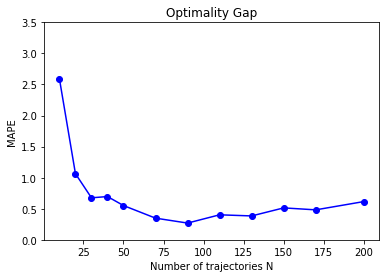

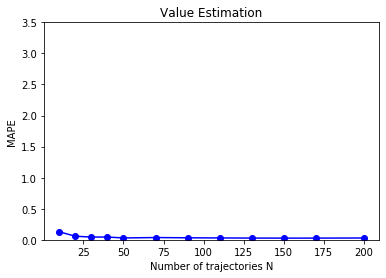

In [15]:
# plot normalized optimality gap
opt_gap = opt_gap/10
print(opt_gap)
opt_gap_norm = opt_gap/0.44 #0.44 is v_opt

fig1, ax1 = plt.subplots()
ax1.plot(Ns, opt_gap_norm, 'bo-')
ax1.set_title('Optimality Gap')
ax1.set_xlabel('Number of trajectories N')
ax1.set_ylabel('MAPE')
ax1.set_ylim(0, 3.5)


# plot normalized value estimate
avg_est = val_est/10
avg_est_norm = avg_est/0.44
print('average estimate', avg_est)
fig1, ax1 = plt.subplots()
ax1.plot(Ns, avg_est_norm, 'bo-')
ax1.set_title('Value Estimation')
ax1.set_xlabel('Number of trajectories N')
ax1.set_ylabel('MAPE')
ax1.set_ylim(0, 3.5)

In [16]:
pickle.dump(opt_gap_norm, open(f'fq_opt_gap_norm_{regression}.sav', 'wb'))
pickle.dump(avg_est_norm, open(f'fq_val_est_norm_{regression}.sav', 'wb'))